# Bank Marketing Project

**Title: : Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not**

**Discription:** Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call. You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**Dataset Attributes:** 

Here is the description of all the variables:

• Variable: Definition

• ID: Unique client ID

• age: Age of the client

• job: Type of job

• marital: Marital status of the client

• education: Education level

• default: Credit in default.

• housing: Housing loan

• loan: Personal loan

• contact: Type of communication

• month: Contact month

• day_of_week: Day of week of contact

• duration: Contact duration

• campaign: number of contacts performed during this campaign to the client

• pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign




**About Dataset:** The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

 You are provided with following 2 files:
 
1.**train.csv :**  Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.**test.csv :** Use the trained model to predict whether a new set of clients will subscribe the term deposit.


**Output variable (desired target):**

•	**Subscribed (target):** has the client subscribed a term deposit? (YES/NO)


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('termdeposit_train.csv')
df

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [3]:
df.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [4]:
df.tail()

ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [5]:
df.shape

(31647, 18)

This dataset has 31647 rows and 18 columns in which 17 columns are an independent variable (input) and one column is dependent variable (output) column.

# Exploratory Data Analysis [EDA]

In [6]:
df.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

Here we can see the list of all the columns present in the dataset

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We see that this dataset contains ['int64', 'object'] type of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Here we can see the information about the dataset like Non-Null Count, total number of rows, type of data present in the dataset, memory used by dataset

**Checking For Null Values:**

In [9]:
#checking for null values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

**Checking for null values by visualing heatmap :**

<AxesSubplot:>

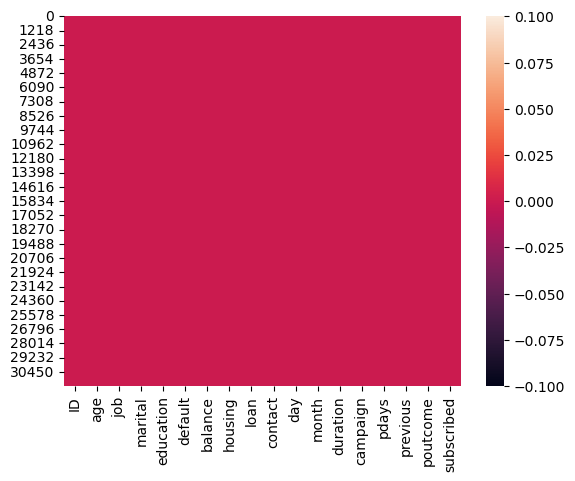

In [10]:
sns.heatmap(df.isnull())

There are no null values present in the Dataset

In [11]:
df.subscribed.nunique()

2

In [12]:
df.value_counts('subscribed')

subscribed
no     27932
yes     3715
dtype: int64

We can see here that in our target variable there are 2 unique values['yes' & 'no'] where number of 'no' variable is greater than 'yes' variable.

**DataSet Statistical Information:**

In [13]:
df.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

**Observation:**

* There is a huge difference between 75th percentile and max value so outliers are present in the dataset.

* The count for all the rows are same so there are no null values present in the dataset.

* In column['balance','duration','pdays'] mean is greater than median so skewness is present in this columns.

* We can also observe mean value, std. value, min. value, 25th percentile,50 percentile,75th percentile max. value of the dataset.

**Separating numerical and categorical columns:**

In [14]:
#checking for categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')

categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']




In [15]:
#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)


numerical columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Data Visualization:

**Univarient Analysis:**

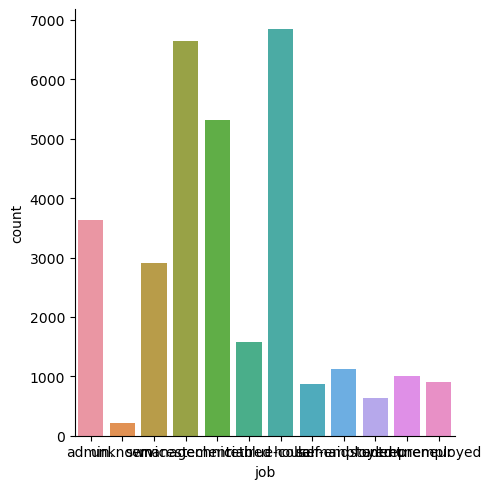

In [16]:
sns.catplot(x='job', data=df, kind='count')
plt.show()

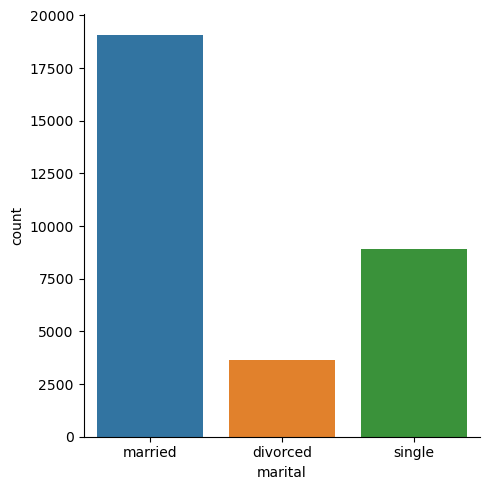

In [17]:
sns.catplot(x='marital', data=df, kind='count')
plt.show()

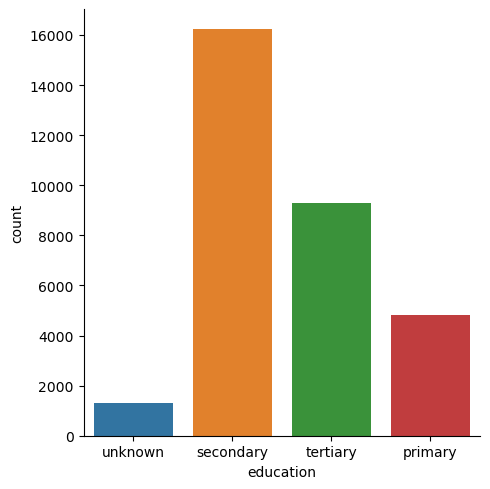

In [18]:
sns.catplot(x='education', data=df, kind='count')
plt.show()

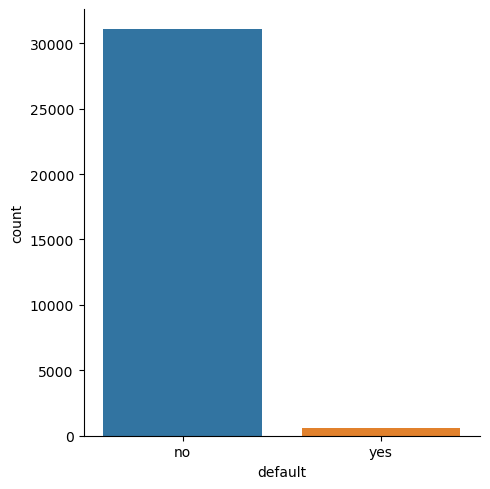

In [19]:
sns.catplot(x='default', data=df, kind='count')
plt.show()

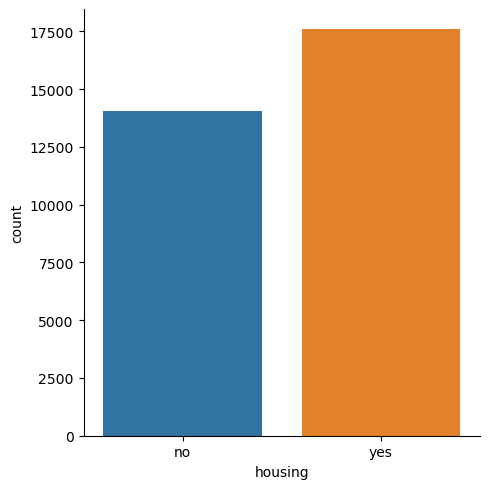

In [20]:
sns.catplot(x='housing', data=df, kind='count')
plt.show()

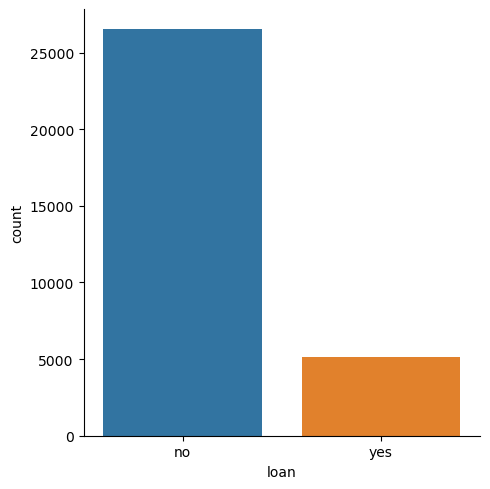

In [21]:
sns.catplot(x='loan', data=df, kind='count')
plt.show()

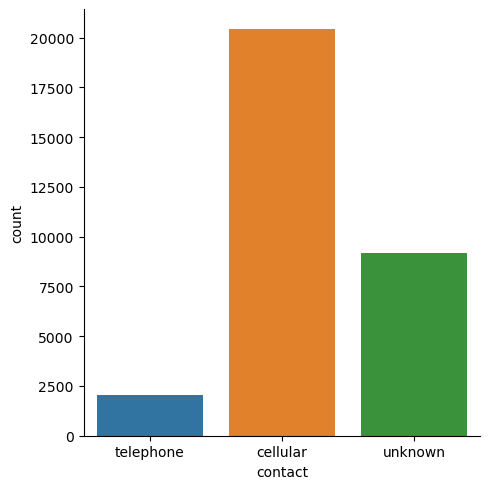

In [22]:
sns.catplot(x='contact', data=df, kind='count')
plt.show()

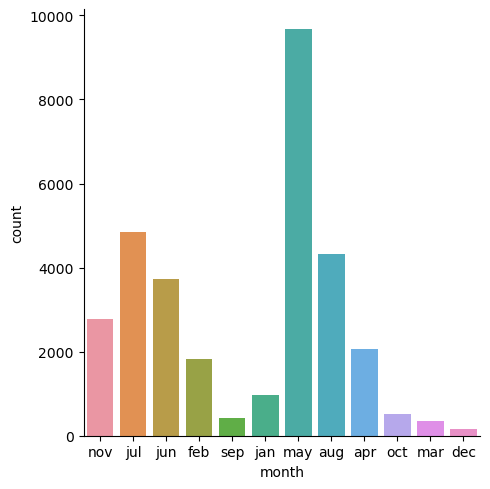

In [23]:
sns.catplot(x='month',data=df, kind='count')
plt.show()

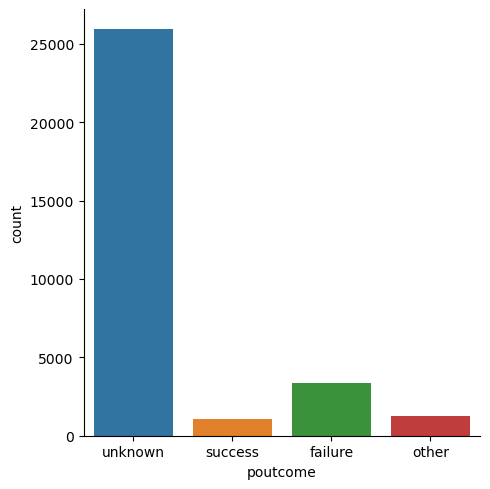

In [24]:
sns.catplot(x='poutcome', data=df, kind='count')
plt.show()

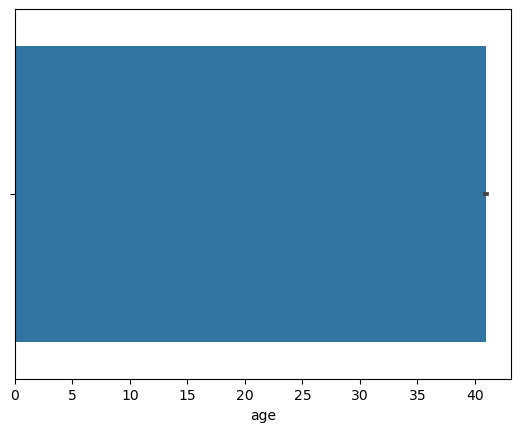

In [25]:
sns.barplot(df['age'])
plt.show()

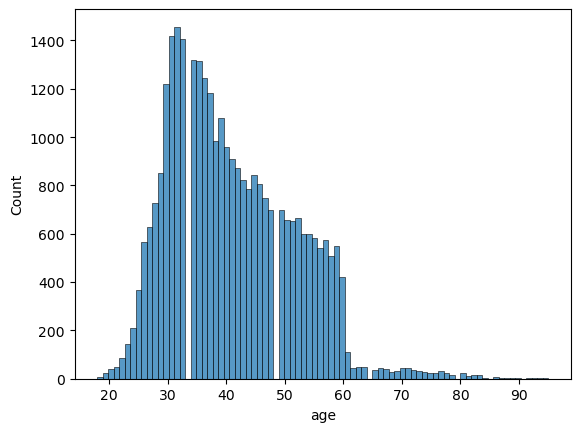

In [26]:
sns.histplot(df['age'])
plt.show()

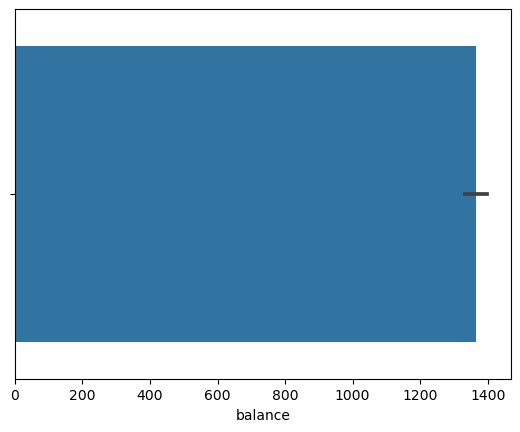

In [27]:
sns.barplot(df['balance'])
plt.show()

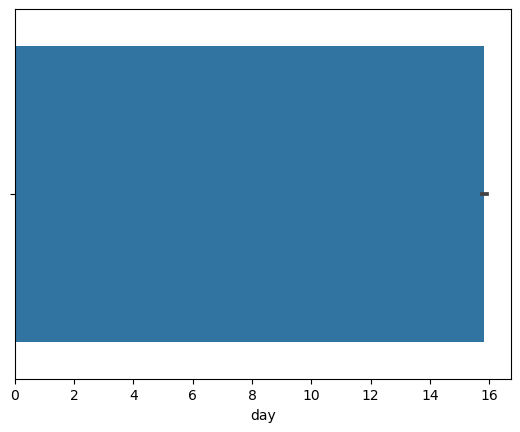

In [28]:
sns.barplot(df['day'])
plt.show()

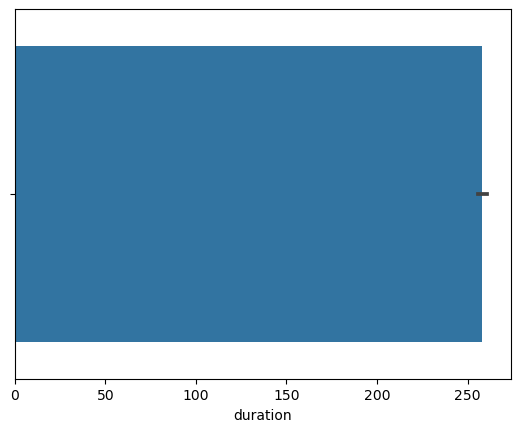

In [29]:
sns.barplot(df['duration'])
plt.show()

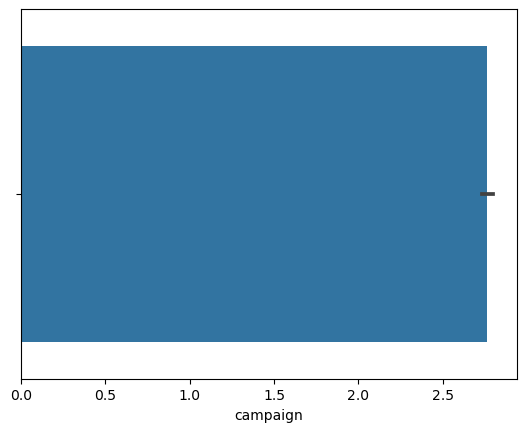

In [30]:
sns.barplot(df['campaign'])
plt.show()

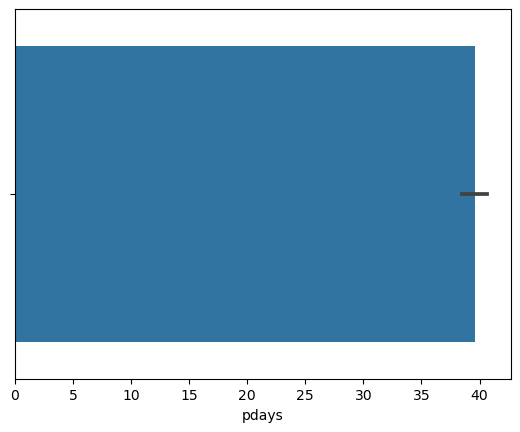

In [31]:
sns.barplot(df['pdays'])
plt.show()

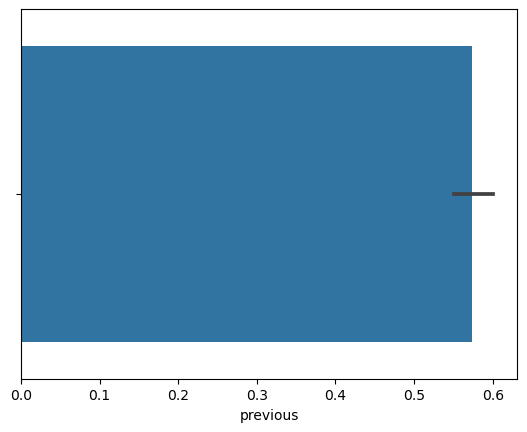

In [32]:
sns.barplot(df['previous'])
plt.show()

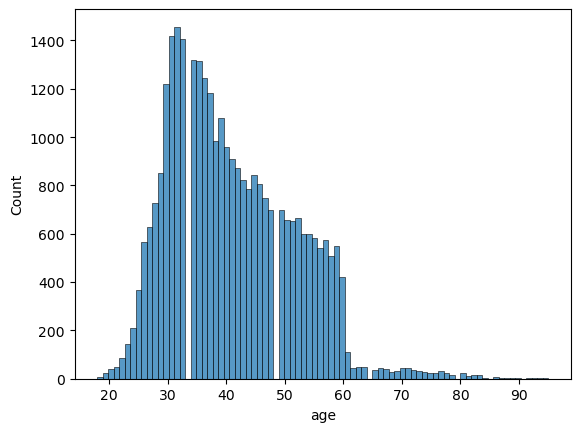

In [33]:
sns.histplot(df['age'])
plt.show()

**Bivarient Analysis:**

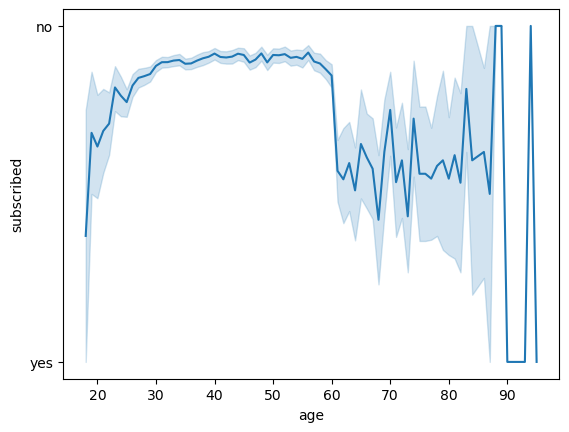

In [34]:
sns.lineplot(x='age', y='subscribed', data=df)
plt.show()

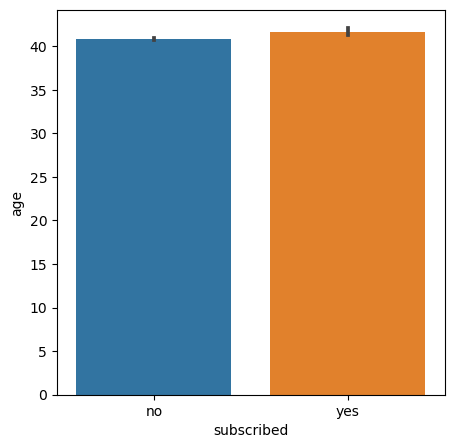

In [35]:
#subscribed vs age
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='age', data=df)
plt.show()

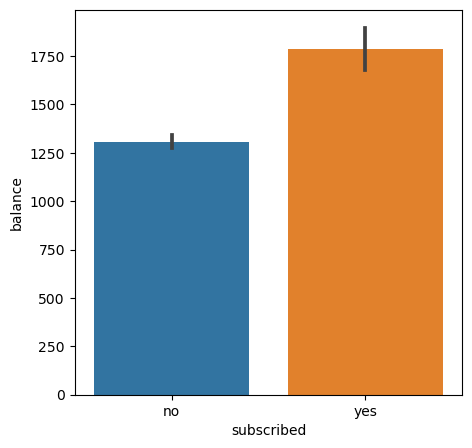

In [36]:
#subscribed vs balance
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='balance', data=df)
plt.show()

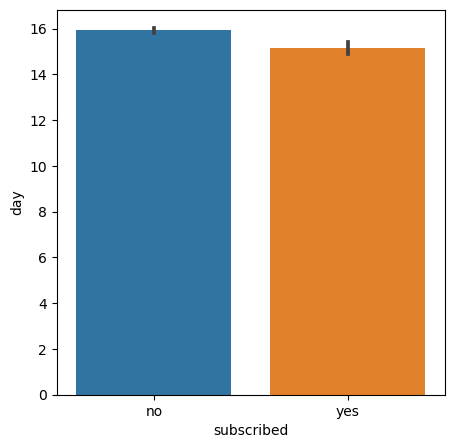

In [37]:
#subscribed vs day
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='day', data=df)
plt.show()

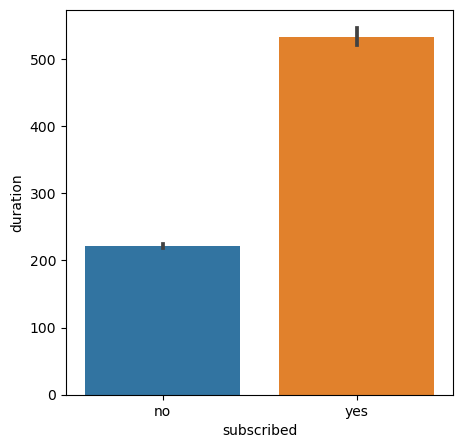

In [38]:
#subscribed vs duration
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='duration', data=df)
plt.show()

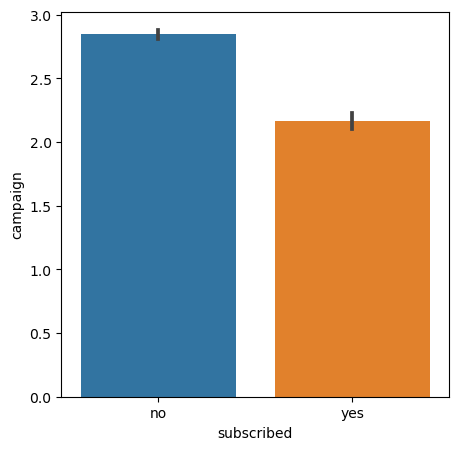

In [39]:
#subscribed vs campaign
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='campaign', data=df)
plt.show()

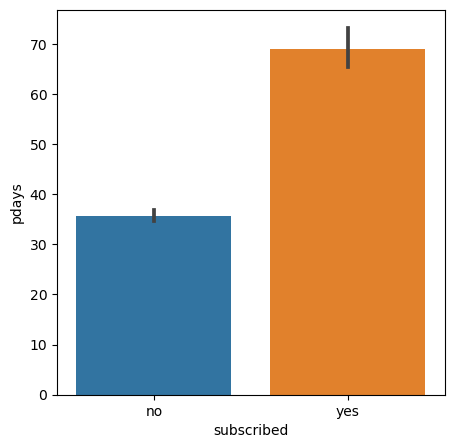

In [40]:
#subscribed vs pdays
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='pdays', data=df)
plt.show()

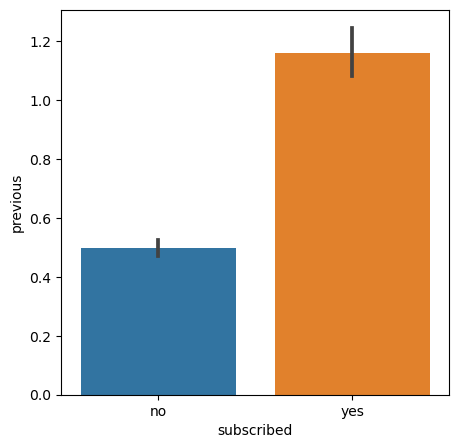

In [41]:
#subscribed vs previous
plot=plt.figure(figsize=(5,5))
sns.barplot(x='subscribed', y='previous', data=df)
plt.show()

**Multivarient Analysis:**

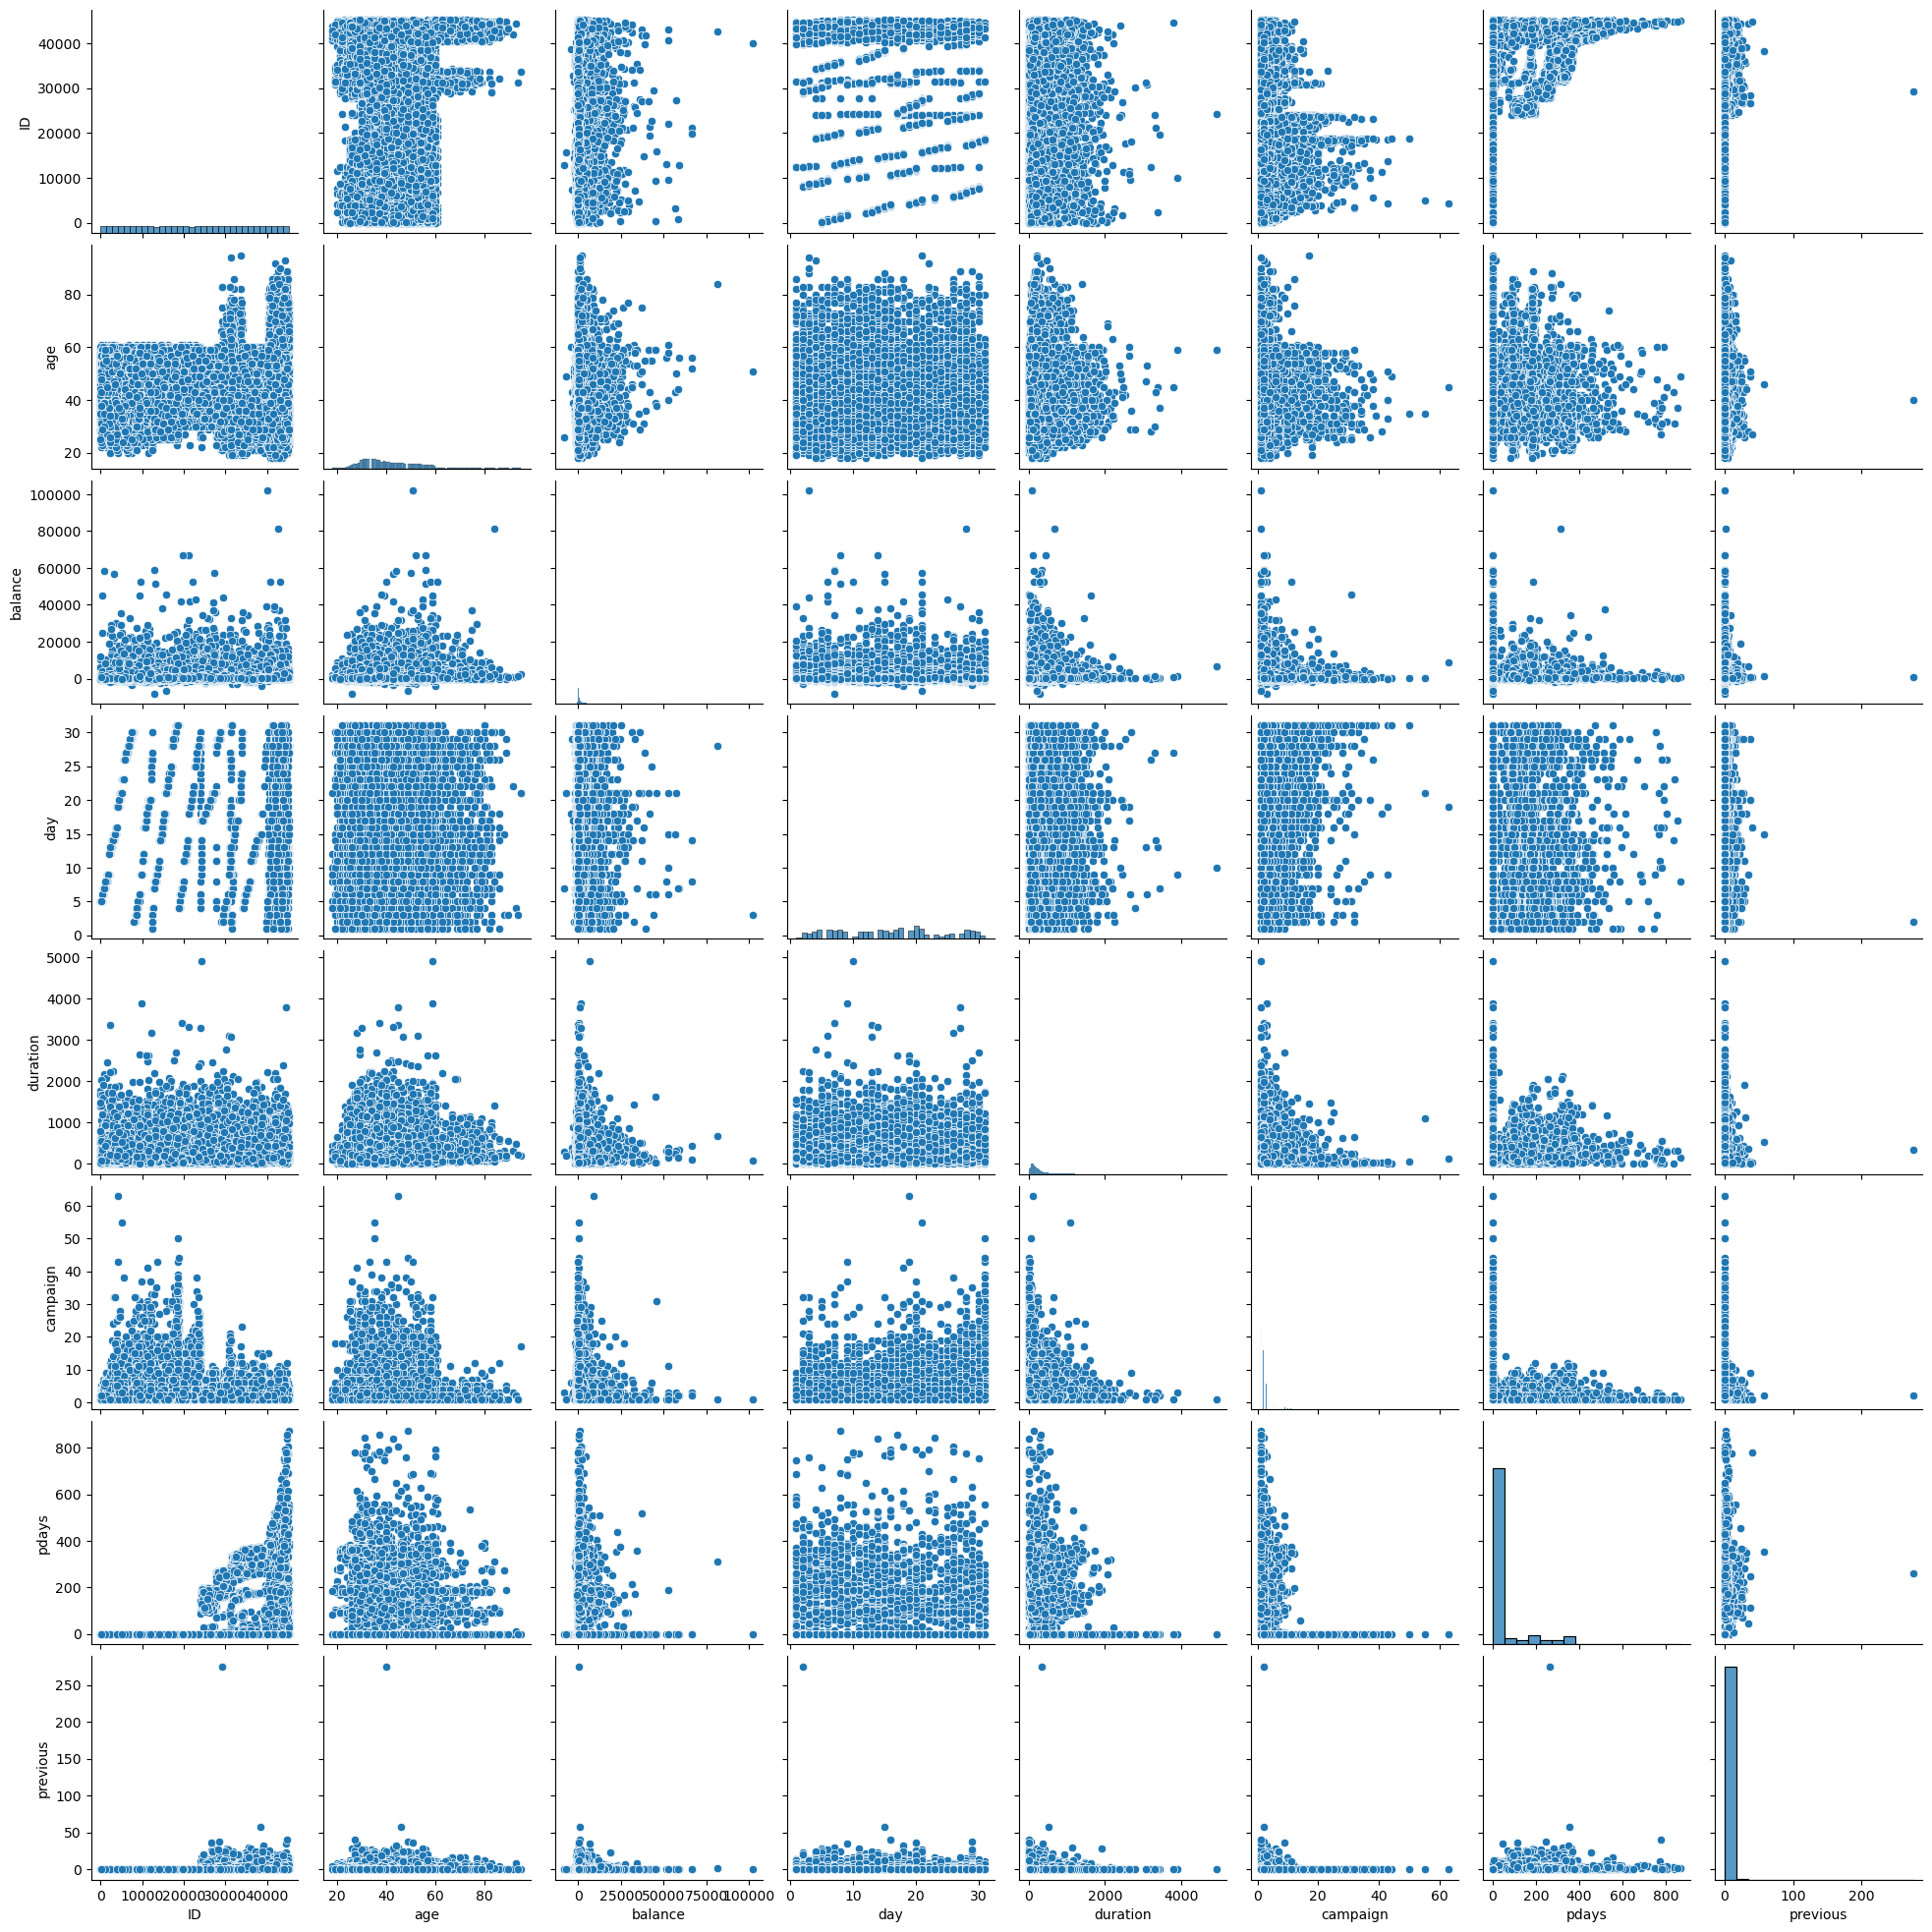

In [42]:
sns.pairplot(df)
plt.show()

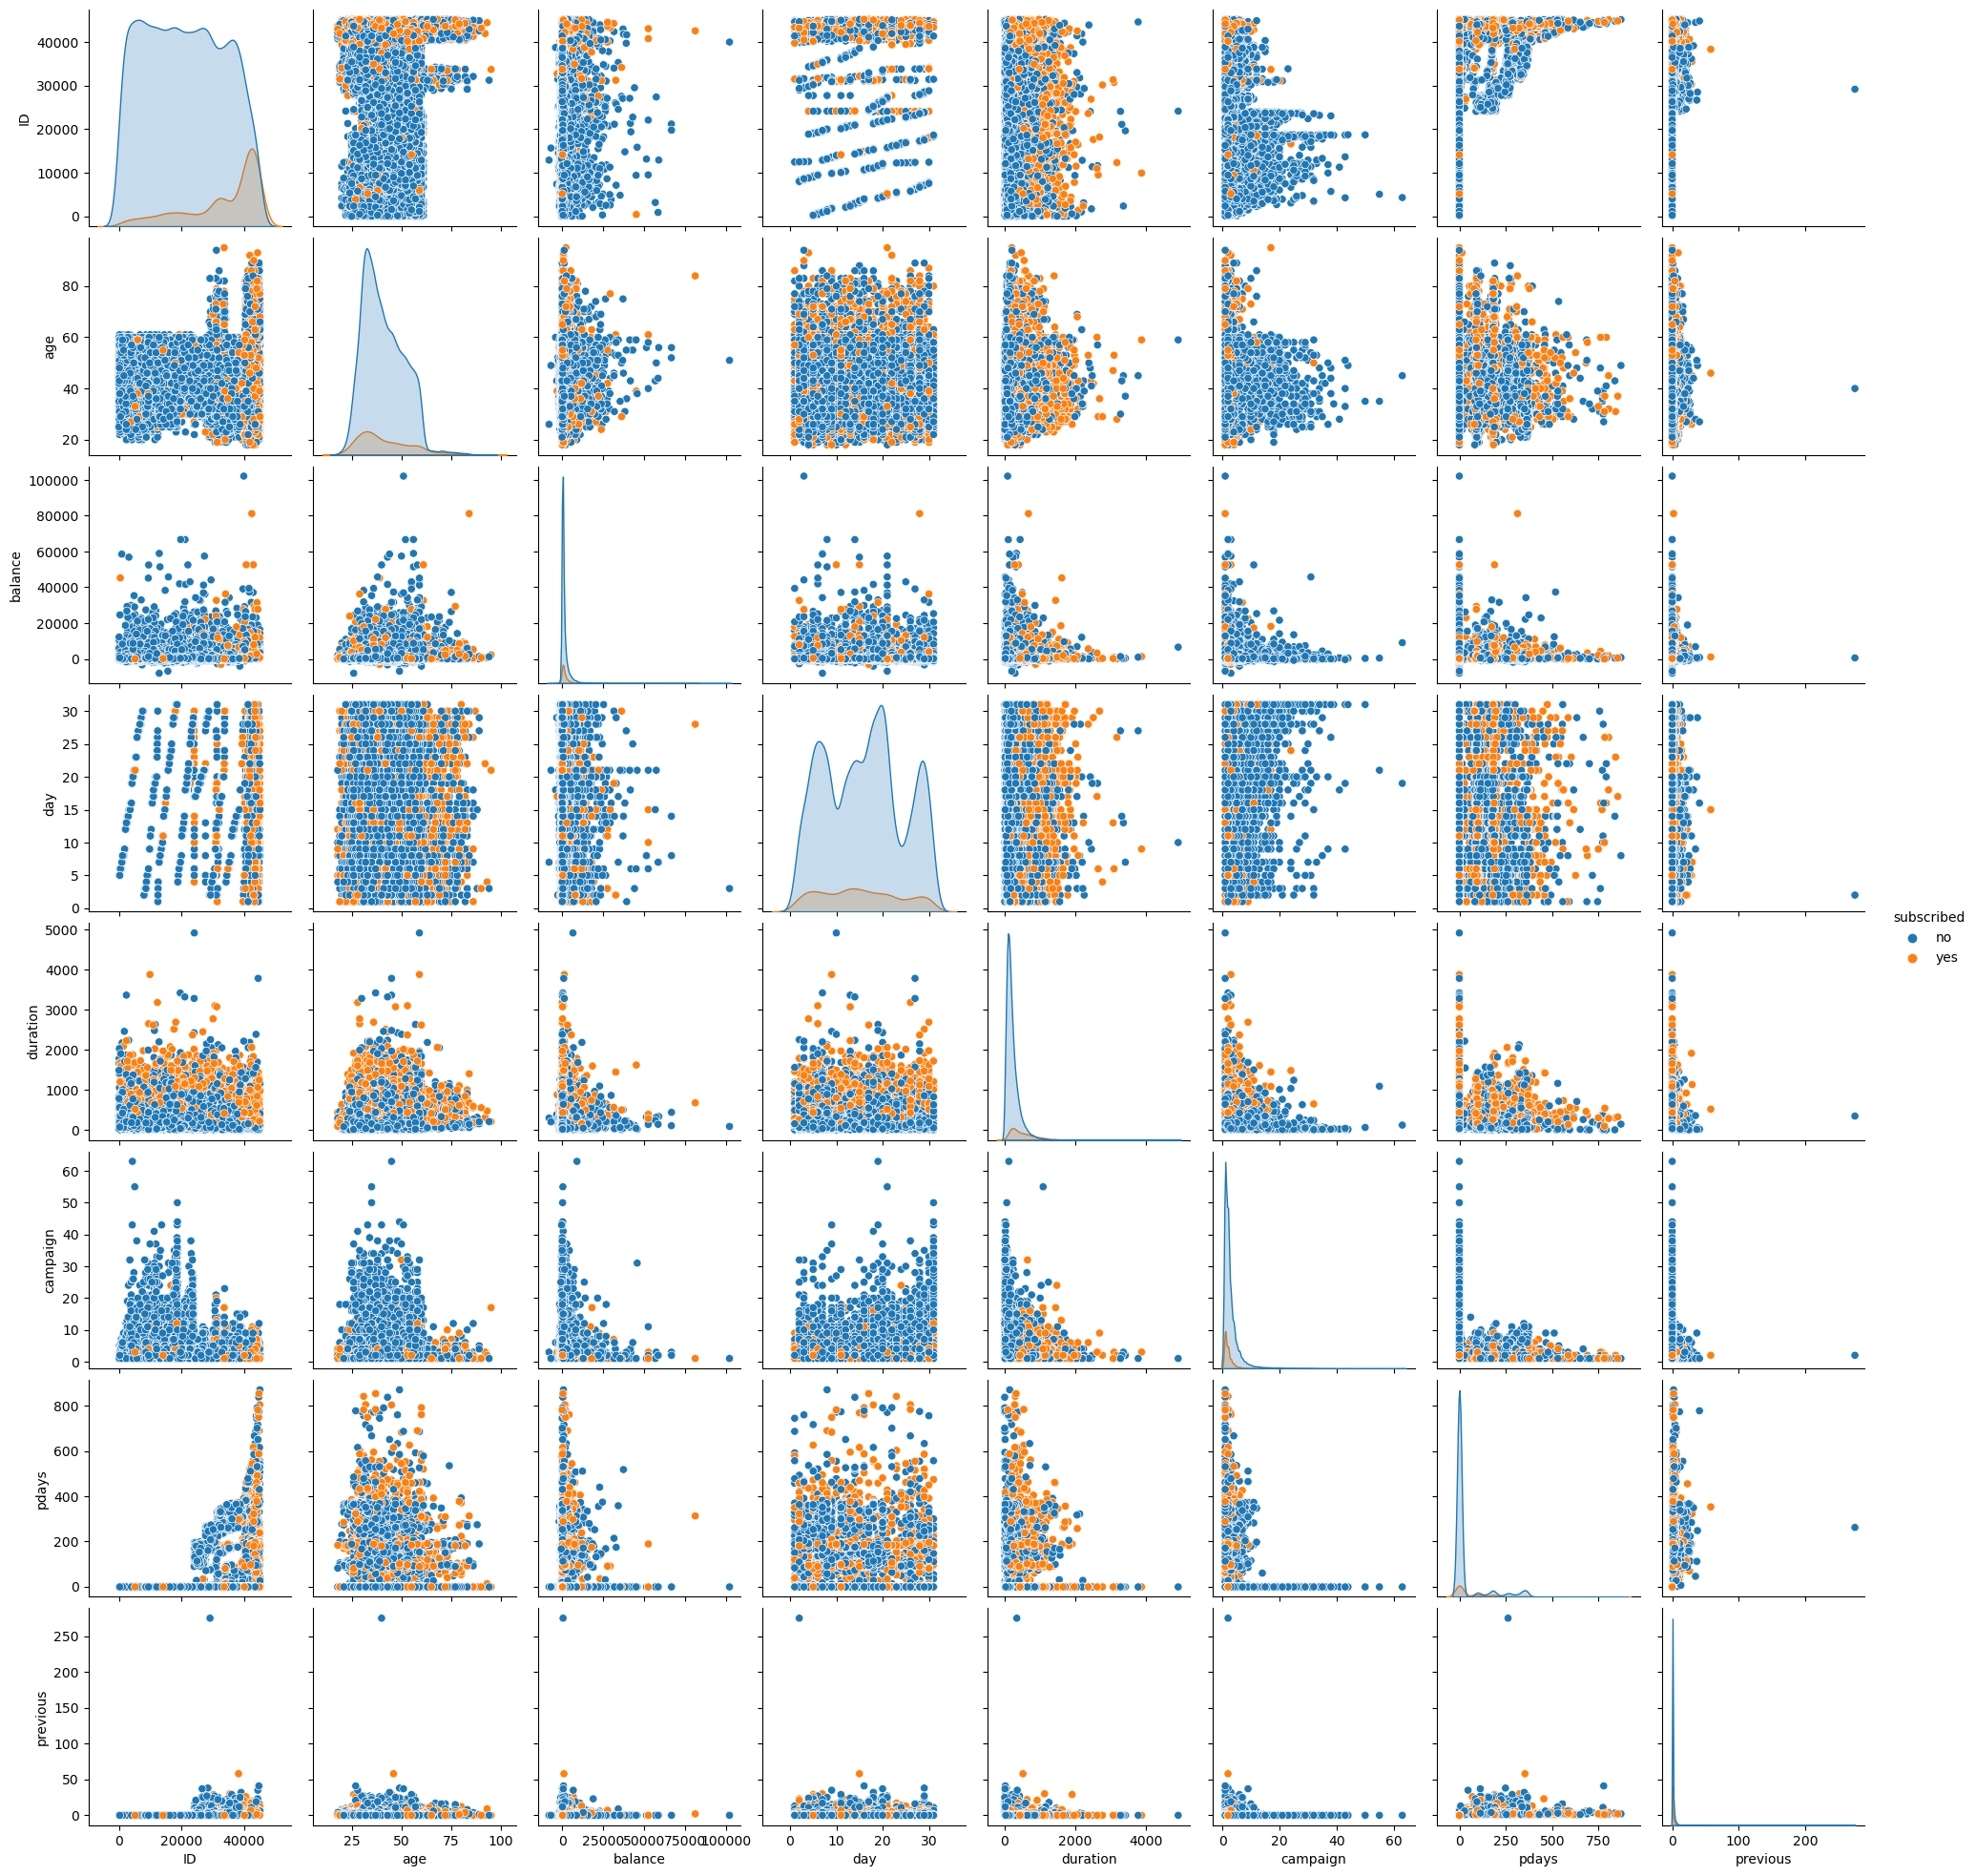

In [43]:
sns.pairplot(df, hue='subscribed')
plt.show()

# Checking for outliers:

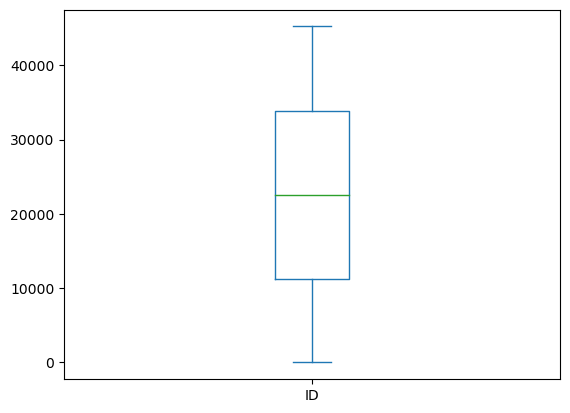

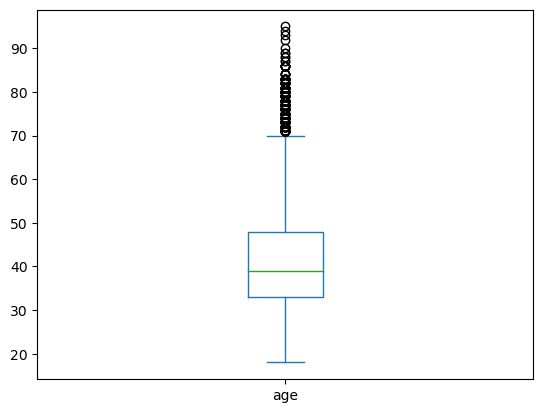

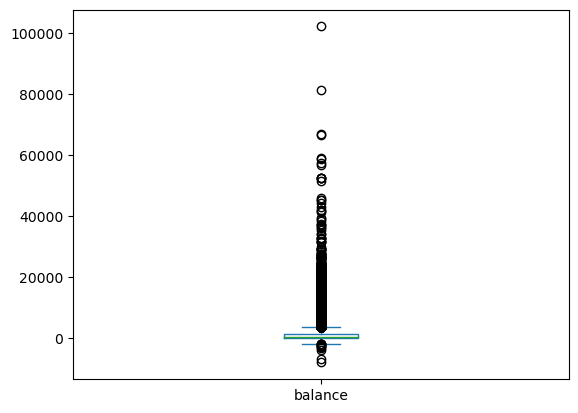

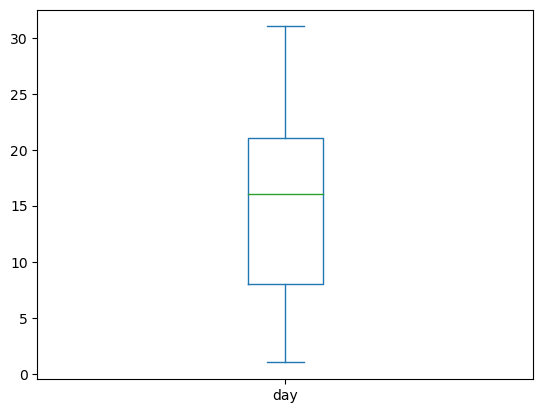

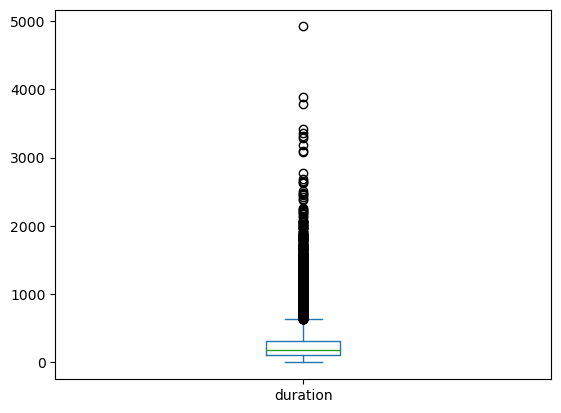

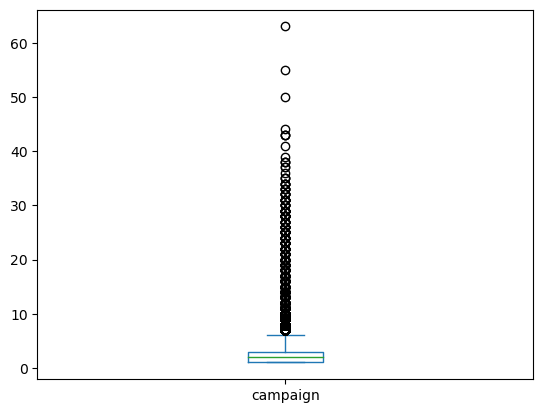

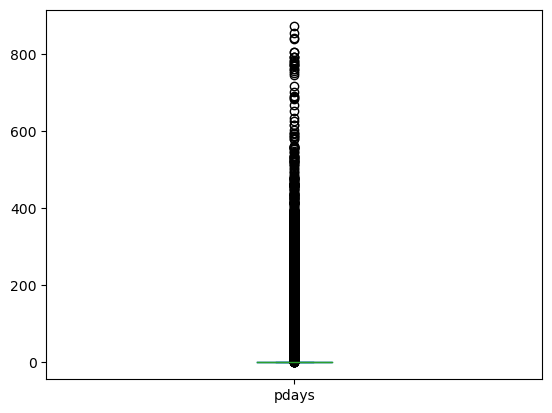

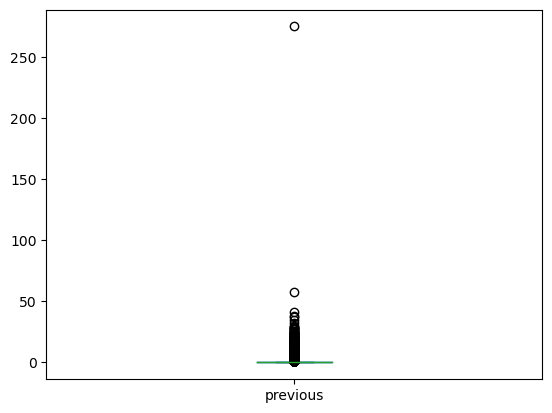

In [44]:
#Box plot visualization
for i in numerical_col:
    df[i].plot.box()
    plt.show()

By using boxplot Here we can see that outliers are present in the dataset

# Removing outliers

In [45]:
#Removing outliers
from scipy.stats import zscore
col=df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
z=np.abs(zscore(col))

z

age   balance  duration  campaign     pdays  previous
0      1.415793  0.187933  0.832754  0.245906  0.408555  0.237059
1      0.937156  0.449397  0.649957  0.245906  0.408555  0.237059
2      1.313627  0.156159  0.070449  0.567059  0.408555  0.237059
3      1.509911  0.635055  2.368149  0.567059  0.447299  1.001336
4      0.937156  0.411091  0.474054  0.567059  0.408555  0.237059
...         ...       ...       ...       ...       ...       ...
31642  1.125392  0.450388  0.552724  0.245906  0.408555  0.237059
31643  1.133439  0.324903  0.699635  0.245906  0.408555  0.237059
31644  0.843038  0.347358  0.859979  0.075247  0.408555  0.237059
31645  1.509911  0.376088  0.918319  1.359859  2.994723  4.716521
31646  1.321675  0.383022  6.669728  0.245906  0.408555  0.237059

[31647 rows x 6 columns]

In [46]:
threshold=3

print(np.where(z>3))

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([3, 1, 4, ..., 4, 5, 2], dtype=int64))


In [47]:
df_new=df[(z<3).all(axis=1)]

df_new

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31640  12109   43  management    single  secondary      no     2968      no   
31641   9476   37  technician    single   tertiary      no     1309      no   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31640   no    unknown   20   jun        30         4     -1         0   
31641   no    unknown    6   jun       442         2     -1         0   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31640  unknown         no  
31641  unknown         no  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  

[28124 rows x 18 columns]

In [48]:
df.shape

(31647, 18)

In [49]:
df_new.shape

(28124, 18)

In [50]:
df=df_new

In [51]:
df.shape

(28124, 18)

Here outliers are removed from the dataset.

# Checking for skewness

In [52]:
#checking for skewness
df.skew()

ID          0.079376
age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

accpectable range is from -0.5 to +0.5

**Removing skewness using cuberoot method:**

In [53]:
df['previous']=np.cbrt(df['previous'])
df['ID']=np.cbrt(df['ID'])
df['age']=np.cbrt(df['age'])
df['balance']=np.cbrt(df['balance'])
df['day']=np.cbrt(df['day'])
df['duration']=np.cbrt(df['duration'])
df['pdays']=np.cbrt(df['pdays'])

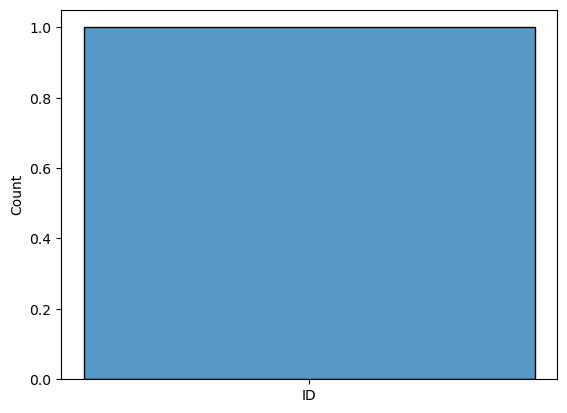

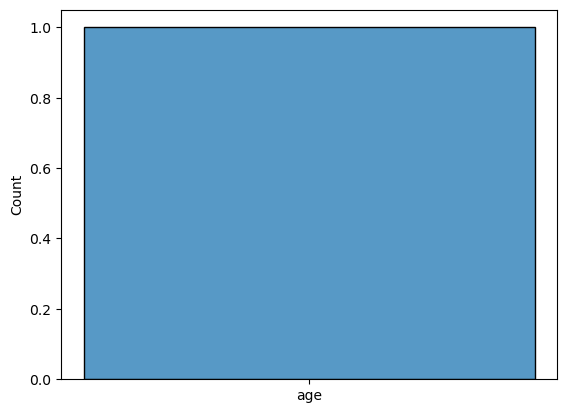

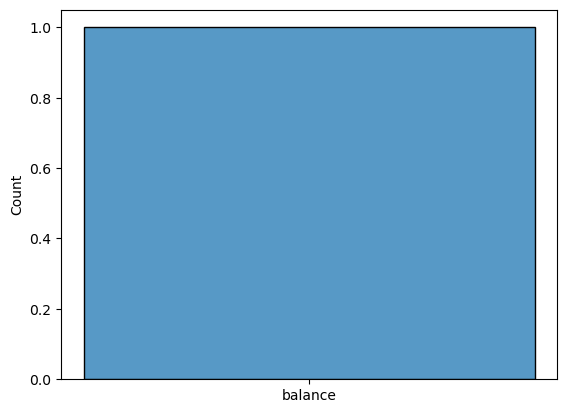

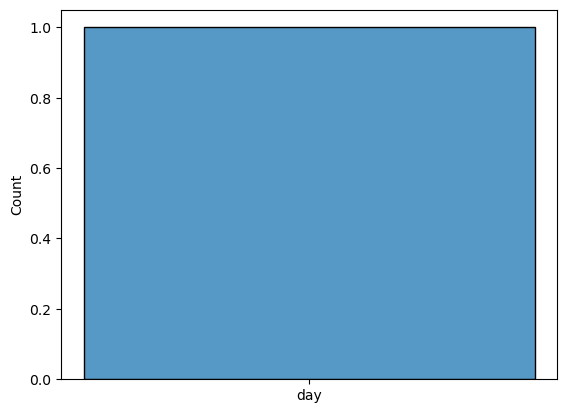

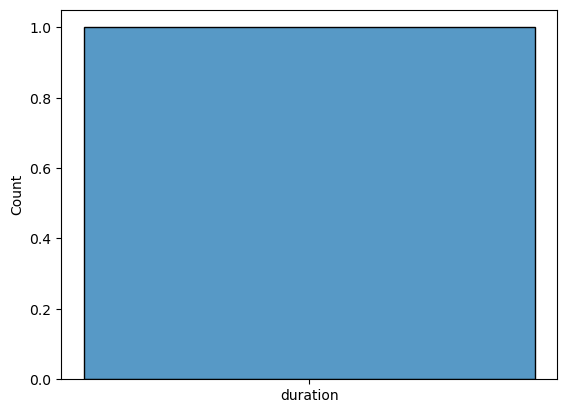

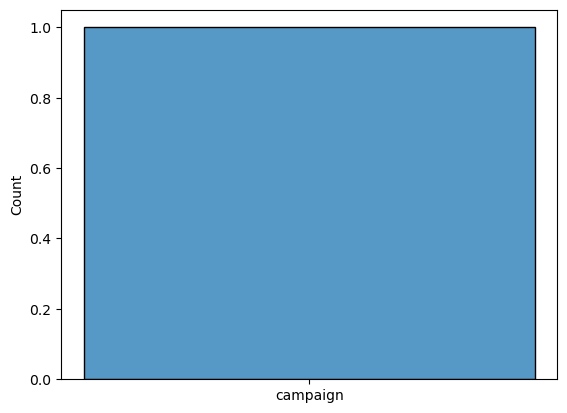

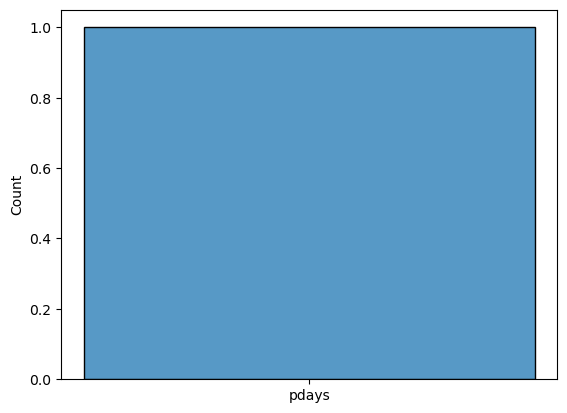

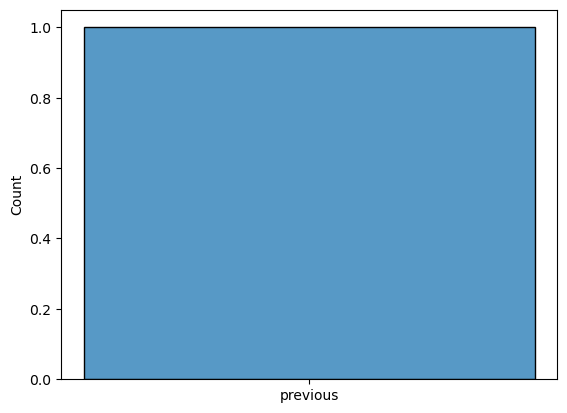

In [54]:
##checking for skewness by visualizing
for i in numerical_col:
    sns.histplot([i])
    plt.show()

Here by visualizaing with histplot we can say that skewness is removed from the dataset.

# Encoding Categorical Columns

In [55]:
#Encoding categorical columns using label Encoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values.reshape(-1,1))
        
df

ID       age  job  marital  education  default    balance  \
0      29.666681  3.825862    0        1          3        0  12.456918   
1      34.362895  3.141381   11        1          1        0   1.442250   
2      24.836263  3.000000    7        1          1        0   9.622603   
3      35.293317  3.848501    4        0          2        0  14.868480   
4      31.017680  3.141381    9        1          1        0   4.918685   
...          ...       ...  ...      ...        ...      ...        ...   
31640  22.963395  3.503398    4        2          1        0  14.371032   
31641  21.161268  3.332222    9        2          2        0  10.939057   
31642  33.166286  3.072317    4        2          2        0   0.000000   
31643  34.250173  3.756286    4        0          2        0   7.243156   
31644  27.012340  3.174802    4        2          2        0   6.782423   

       housing  loan  contact       day  month  duration  campaign     pdays  \
0            0     0        1  2.668402      9  3.530348         2 -1.000000   
1            0     0        0  2.714418      5  4.497941         2 -1.000000   
2            1     0        0  2.620741      5  6.214465         1 -1.000000   
3            0     0        0  2.802039      6  9.535417         1  4.379519   
4            1     0        0  1.587401      3  7.243156         1 -1.000000   
...        ...   ...      ...       ...    ...       ...       ...       ...   
31640        0     0        2  2.714418      6  3.107233         4 -1.000000   
31641        0     0        2  1.817121      6  7.617412         2 -1.000000   
31642        1     0        0  2.289428      8  4.876999         2 -1.000000   
31643        0     1        0  1.709976      6  7.594363         2 -1.000000   
31644        0     0        0  1.912931      1  3.332222         3 -1.000000   

       previous  poutcome  subscribed  
0       0.00000         3           0  
1       0.00000         3           0  
2       0.00000         3           0  
3       1.44225         2           1  
4       0.00000         3           0  
...         ...       ...         ...  
31640   0.00000         3           0  
31641   0.00000         3           0  
31642   0.00000         3           0  
31643   0.00000         3           1  
31644   0.00000         3           0  

[28124 rows x 18 columns]

We have converted the categorical columns into numerical columns using Label Encoder

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28124 entries, 0 to 31644
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          28124 non-null  float64
 1   age         28124 non-null  float64
 2   job         28124 non-null  int32  
 3   marital     28124 non-null  int32  
 4   education   28124 non-null  int32  
 5   default     28124 non-null  int32  
 6   balance     28124 non-null  float64
 7   housing     28124 non-null  int32  
 8   loan        28124 non-null  int32  
 9   contact     28124 non-null  int32  
 10  day         28124 non-null  float64
 11  month       28124 non-null  int32  
 12  duration    28124 non-null  float64
 13  campaign    28124 non-null  int64  
 14  pdays       28124 non-null  float64
 15  previous    28124 non-null  float64
 16  poutcome    28124 non-null  int32  
 17  subscribed  28124 non-null  int32  
dtypes: float64(7), int32(10), int64(1)
memory usage: 3.0 MB


As we can see that data type is changed in the dataset

In [58]:
#statistical summary of numerical column
df.describe()

ID           age           job       marital     education  \
count  28124.000000  28124.000000  28124.000000  28124.000000  28124.000000   
mean      26.284369      3.415138      4.346146      1.167722      1.225039   
std        6.953382      0.282160      3.288341      0.605709      0.746758   
min        1.259921      2.620741      0.000000      0.000000      0.000000   
25%       21.891511      3.207534      1.000000      1.000000      1.000000   
50%       27.728889      3.391211      4.000000      1.000000      1.000000   
75%       31.880167      3.634241      7.000000      2.000000      2.000000   
max       35.624177      4.160168     11.000000      2.000000      3.000000   

            default       balance       housing          loan       contact  \
count  28124.000000  28124.000000  28124.000000  28124.000000  28124.000000   
mean       0.019201      7.141730      0.550633      0.166797      0.671455   
std        0.137232      6.195192      0.497439      0.372801      0.912957   
min        0.000000    -18.988913      0.000000      0.000000      0.000000   
25%        0.000000      4.041240      0.000000      0.000000      0.000000   
50%        0.000000      7.547842      1.000000      0.000000      0.000000   
75%        0.000000     11.049365      1.000000      0.000000      2.000000   
max        1.000000     21.857900      1.000000      1.000000      2.000000   

                day         month      duration      campaign         pdays  \
count  28124.000000  28124.000000  28124.000000  28124.000000  28124.000000   
mean       2.411519      5.490755      5.772855      2.455910     -0.094533   
std        0.513862      2.985288      1.561701      1.935877      2.280799   
min        1.000000      0.000000      0.000000      1.000000     -1.000000   
25%        2.000000      3.000000      4.702669      1.000000     -1.000000   
50%        2.519842      6.000000      5.625226      2.000000     -1.000000   
75%        2.802039      8.000000      6.738664      3.000000     -1.000000   
max        3.141381     11.000000     10.095747     12.000000      6.958943   

           previous      poutcome    subscribed  
count  28124.000000  28124.000000  28124.000000  
mean       0.180988      2.669855      0.101693  
std        0.460735      0.874267      0.302249  
min        0.000000      0.000000      0.000000  
25%        0.000000      3.000000      0.000000  
50%        0.000000      3.000000      0.000000  
75%        0.000000      3.000000      0.000000  
max        1.912931      3.000000      1.000000

After encoding the categorical columns we can see all columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method describe the count,mean,std.,IQR and max values of all the columns.

# Correlation between target variable and independent variables

In [59]:
#checking the correlation between features and target 
cor=df.corr()
cor

ID       age       job   marital  education   default  \
ID          1.000000 -0.029855  0.080738  0.078112   0.112215 -0.038008   
age        -0.029855  1.000000 -0.035791 -0.425664  -0.099901 -0.008638   
job         0.080738 -0.035791  1.000000  0.067076   0.169526 -0.007400   
marital     0.078112 -0.425664  0.067076  1.000000   0.109940 -0.012221   
education   0.112215 -0.099901  0.169526  0.109940   1.000000 -0.007467   
default    -0.038008 -0.008638 -0.007400 -0.012221  -0.007467  1.000000   
balance     0.134449  0.075634  0.026094  0.034716   0.064140 -0.209161   
housing    -0.250561 -0.142528 -0.122764 -0.026593  -0.096581 -0.014763   
loan       -0.048052  0.007778 -0.038629 -0.045159  -0.047982  0.081270   
contact    -0.789722  0.032777 -0.084375 -0.042070  -0.121975  0.014592   
day         0.016961 -0.003128  0.009860 -0.014975   0.008297  0.004506   
month      -0.294621 -0.041768 -0.088359 -0.003321  -0.056416  0.007290   
duration   -0.006929 -0.035167 -0.003418  0.016357   0.002066 -0.000054   
campaign   -0.034756  0.040875  0.004785 -0.023093  -0.007464  0.012556   
pdays       0.369557 -0.007177  0.012431  0.021377   0.048220 -0.038843   
previous    0.370812 -0.002078  0.016147  0.023993   0.054828 -0.040773   
poutcome   -0.338705  0.001802 -0.011441 -0.015021  -0.041203  0.035944   
subscribed  0.257421 -0.019430  0.036743  0.056387   0.075838 -0.014500   

             balance   housing      loan   contact       day     month  \
ID          0.134449 -0.250561 -0.048052 -0.789722  0.016961 -0.294621   
age         0.075634 -0.142528  0.007778  0.032777 -0.003128 -0.041768   
job         0.026094 -0.122764 -0.038629 -0.084375  0.009860 -0.088359   
marital     0.034716 -0.026593 -0.045159 -0.042070 -0.014975 -0.003321   
education   0.064140 -0.096581 -0.047982 -0.121975  0.008297 -0.056416   
default    -0.209161 -0.014763  0.081270  0.014592  0.004506  0.007290   
balance     1.000000 -0.070652 -0.140556 -0.055374 -0.008487 -0.004558   
housing    -0.070652  1.000000  0.031251  0.215776 -0.000079  0.274293   
loan       -0.140556  0.031251  1.000000 -0.012620  0.010652  0.026898   
contact    -0.055374  0.215776 -0.012620  1.000000 -0.036088  0.392662   
day        -0.008487 -0.000079  0.010652 -0.036088  1.000000  0.037803   
month      -0.004558  0.274293  0.026898  0.392662  0.037803  1.000000   
duration    0.024577  0.011891 -0.006263 -0.034850 -0.034753  0.003313   
campaign   -0.022716 -0.041216 -0.001955  0.002145  0.128072 -0.120500   
pdays       0.090450  0.033460 -0.014711 -0.261336 -0.058345 -0.029899   
previous    0.094890  0.011504 -0.018351 -0.257049 -0.058970 -0.016079   
poutcome   -0.082925 -0.049579  0.001714  0.248117  0.053509  0.022734   
subscribed  0.094746 -0.145640 -0.074803 -0.158031 -0.035511 -0.022564   

            duration  campaign     pdays  previous  poutcome  subscribed  
ID         -0.006929 -0.034756  0.369557  0.370812 -0.338705    0.257421  
age        -0.035167  0.040875 -0.007177 -0.002078  0.001802   -0.019430  
job        -0.003418  0.004785  0.012431  0.016147 -0.011441    0.036743  
marital     0.016357 -0.023093  0.021377  0.023993 -0.015021    0.056387  
education   0.002066 -0.007464  0.048220  0.054828 -0.041203    0.075838  
default    -0.000054  0.012556 -0.038843 -0.040773  0.035944   -0.014500  
balance     0.024577 -0.022716  0.090450  0.094890 -0.082925    0.094746  
housing     0.011891 -0.041216  0.033460  0.011504 -0.049579   -0.145640  
loan       -0.006263 -0.001955 -0.014711 -0.018351  0.001714   -0.074803  
contact    -0.034850  0.002145 -0.261336 -0.257049  0.248117   -0.158031  
day        -0.034753  0.128072 -0.058345 -0.058970  0.053509   -0.035511  
month       0.003313 -0.120500 -0.029899 -0.016079  0.022734   -0.022564  
duration    1.000000 -0.115620  0.025988  0.027236 -0.006820    0.328075  
campaign   -0.115620  1.000000 -0.100168 -0.093376  0.097109   -0.075836  
pdays       0.025988 -0.100168  1.000000  0.958400 -0.937836

accptable range is -1 to +1

This gives the correlation between the dependent and independent variables. we cant visualize this by plotting heatmap.

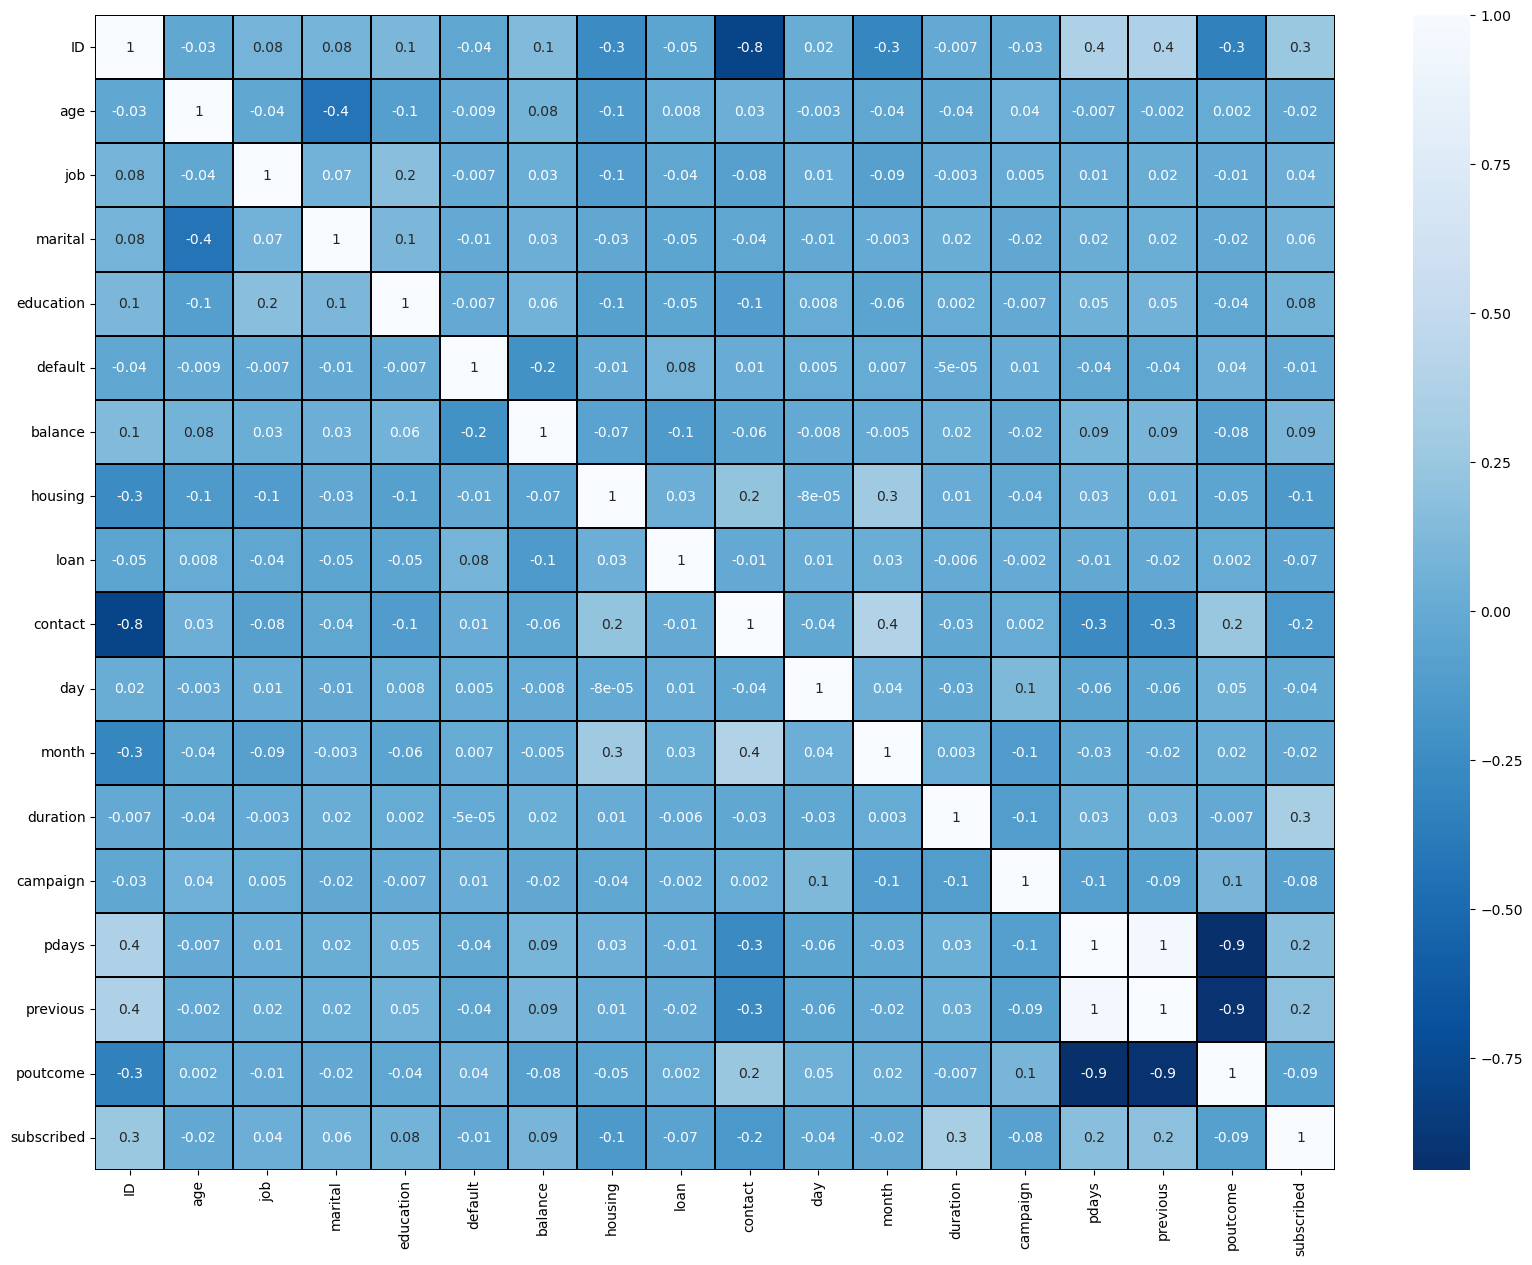

In [60]:
#visualizng the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt='.1g', linecolor='black', annot=True, cmap='Blues_r')
plt.yticks(rotation=0);
plt.show() 

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between input and target variable. This heatmap contains both positive and negative correlation

In [61]:
cor['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.328075
ID            0.257421
previous      0.189480
pdays         0.167936
balance       0.094746
education     0.075838
marital       0.056387
job           0.036743
default      -0.014500
age          -0.019430
month        -0.022564
day          -0.035511
loan         -0.074803
campaign     -0.075836
poutcome     -0.091071
housing      -0.145640
contact      -0.158031
Name: subscribed, dtype: float64

We can observe the positive and negative correlated features with the target

# Visualizing the correlation between label and features using bar plot

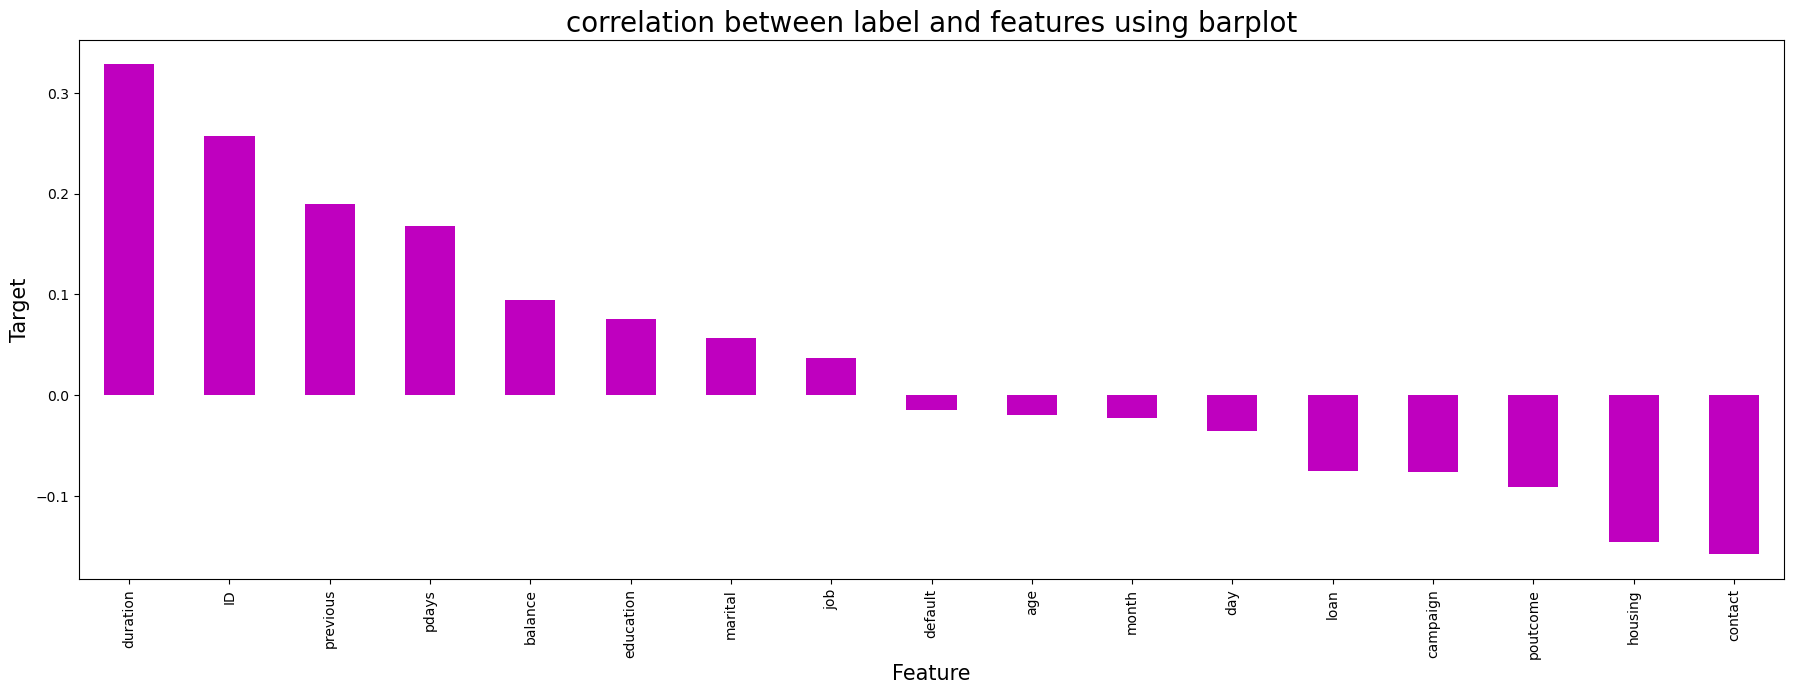

In [62]:
plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("correlation between label and features using barplot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features default and age have very less correlation with column.

# Seprating Columns into  features and  Target label


In [63]:
x=df.drop('subscribed',axis=1)
y=df['subscribed']

In [64]:
x

ID       age  job  marital  education  default    balance  \
0      29.666681  3.825862    0        1          3        0  12.456918   
1      34.362895  3.141381   11        1          1        0   1.442250   
2      24.836263  3.000000    7        1          1        0   9.622603   
3      35.293317  3.848501    4        0          2        0  14.868480   
4      31.017680  3.141381    9        1          1        0   4.918685   
...          ...       ...  ...      ...        ...      ...        ...   
31640  22.963395  3.503398    4        2          1        0  14.371032   
31641  21.161268  3.332222    9        2          2        0  10.939057   
31642  33.166286  3.072317    4        2          2        0   0.000000   
31643  34.250173  3.756286    4        0          2        0   7.243156   
31644  27.012340  3.174802    4        2          2        0   6.782423   

       housing  loan  contact       day  month  duration  campaign     pdays  \
0            0     0        1  2.668402      9  3.530348         2 -1.000000   
1            0     0        0  2.714418      5  4.497941         2 -1.000000   
2            1     0        0  2.620741      5  6.214465         1 -1.000000   
3            0     0        0  2.802039      6  9.535417         1  4.379519   
4            1     0        0  1.587401      3  7.243156         1 -1.000000   
...        ...   ...      ...       ...    ...       ...       ...       ...   
31640        0     0        2  2.714418      6  3.107233         4 -1.000000   
31641        0     0        2  1.817121      6  7.617412         2 -1.000000   
31642        1     0        0  2.289428      8  4.876999         2 -1.000000   
31643        0     1        0  1.709976      6  7.594363         2 -1.000000   
31644        0     0        0  1.912931      1  3.332222         3 -1.000000   

       previous  poutcome  
0       0.00000         3  
1       0.00000         3  
2       0.00000         3  
3       1.44225         2  
4       0.00000         3  
...         ...       ...  
31640   0.00000         3  
31641   0.00000         3  
31642   0.00000         3  
31643   0.00000         3  
31644   0.00000         3  

[28124 rows x 17 columns]

In [65]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: subscribed, Length: 28124, dtype: int32

In [66]:
x.shape

(28124, 17)

In [67]:
y.shape

(28124,)

# Feature Scalling Using Standard Scalarization

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

ID       age       job   marital  education   default   balance  \
0      0.486435  1.455669 -1.321707 -0.276906   2.376931 -0.139916  0.857969   
1      1.161833 -0.970238  2.023504 -0.276906  -0.301360 -0.139916 -0.920001   
2     -0.208263 -1.471313  0.807064 -0.276906  -0.301360 -0.139916  0.400458   
3      1.295644  1.535904 -0.105266 -1.927894   1.037785 -0.139916  1.247239   
4      0.680733 -0.970238  1.415284 -0.276906  -0.301360 -0.139916 -0.358840   
...         ...       ...       ...       ...        ...       ...       ...   
28119 -0.477614  0.312806 -0.105266  1.374081  -0.301360 -0.139916  1.166942   
28120 -0.736791 -0.293868  1.415284  1.374081   1.037785 -0.139916  0.612958   
28121  0.989740 -1.215011 -0.105266  1.374081   1.037785 -0.139916 -1.152806   
28122  1.145622  1.209079 -0.105266 -1.927894   1.037785 -0.139916  0.016372   
28123  0.104695 -0.851788 -0.105266  1.374081   1.037785 -0.139916 -0.057999   

        housing      loan   contact       day     month  duration  campaign  \
0     -1.106956 -0.447423  0.359876  0.499914  1.175534 -1.435964 -0.235510   
1     -1.106956 -0.447423 -0.735486  0.589465 -0.164394 -0.816377 -0.235510   
2      0.903378 -0.447423 -0.735486  0.407163 -0.164394  0.282780 -0.752080   
3     -1.106956 -0.447423 -0.735486  0.759984  0.170588  2.409314 -0.752080   
4      0.903378 -0.447423 -0.735486 -1.603802 -0.834358  0.941491 -0.752080   
...         ...       ...       ...       ...       ...       ...       ...   
28119 -1.106956 -0.447423  1.455237  0.589465  0.170588 -1.706902  0.797632   
28120 -1.106956 -0.447423  1.455237 -1.156749  0.170588  1.181141 -0.235510   
28121  0.903378 -0.447423 -0.735486 -0.237599  0.840552 -0.573652 -0.235510   
28122 -1.106956  2.235019 -0.735486 -1.365261  0.170588  1.166382 -0.235510   
28123 -1.106956 -0.447423 -0.735486 -0.970293 -1.504322 -1.562832  0.281061   

          pdays  previous  poutcome  
0     -0.397003 -0.392832  0.377632  
1     -0.397003 -0.392832  0.377632  
2     -0.397003 -0.392832  0.377632  
3      1.961651  2.737549 -0.766204  
4     -0.397003 -0.392832  0.377632  
...         ...       ...       ...  
28119 -0.397003 -0.392832  0.377632  
28120 -0.397003 -0.392832  0.377632  
28121 -0.397003 -0.392832  0.377632  
28122 -0.397003 -0.392832  0.377632  
28123 -0.397003 -0.392832  0.377632  

[28124 rows x 17 columns]

We have scaled the data using standard scalarization method to overcome the issue of biasness standard scaler will convert mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking Variance Inflation factor(VIF)

In [69]:
#Finding varience inflation factor in each column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values   Features
0     3.071198         ID
1     1.284416        age
2     1.049235        job
3     1.250373    marital
4     1.065851  education
5     1.050715    default
6     1.103762    balance
7     1.199756    housing
8     1.035652       loan
9     2.958635    contact
10    1.029239        day
11    1.282529      month
12    1.025517   duration
13    1.060527   campaign
14   17.949027      pdays
15   12.650283   previous
16    8.502281   poutcome

Accpectable range is betwen +10 to -10

we firstly drop the column with highest vif value

In [71]:
#dropping pdays column 
x.drop('pdays', axis=1, inplace=True)

In [72]:
#again checking vif value to confrim whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF values   Features
0     3.061634         ID
1     1.284156        age
2     1.049161        job
3     1.250326    marital
4     1.065809  education
5     1.050707    default
6     1.103761    balance
7     1.196279    housing
8     1.035577       loan
9     2.957258    contact
10    1.029225        day
11    1.279456      month
12    1.024783   duration
13    1.059877   campaign
14    6.060322   previous
15    5.919382   poutcome

Now here we can say that all the columns has vif value in accpectable range and multicolinearity is removed from the dataset.

In [73]:
y.value_counts()

0    25264
1     2860
Name: subscribed, dtype: int64

Here we can see that the data is not balanced since it is a classification problem we will balance the data using oversampling method

# Oversampling

In [74]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [75]:
#checking value count of target column
y.value_counts()

0    25264
1    25264
Name: subscribed, dtype: int64

Now the data is balanced Now we can start using machine learning model.

# Modelling

# Finding the best random state

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracy is', maxAccu, 'at random_state', maxRS)

Best accuracy is 0.9575169866086154 at random_state 14


# Creating train test split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=maxRS)

# Classification Algorithms

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge

# Random Forest Classifier

In [80]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9562636057787453
[[7106  528]
 [ 135 7390]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7634
           1       0.93      0.98      0.96      7525

    accuracy                           0.96     15159
   macro avg       0.96      0.96      0.96     15159
weighted avg       0.96      0.96      0.96     15159



# Logistic Regression

In [81]:
#checking accuracy for logisticregression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR= LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.844514809684016
[[6343 1291]
 [1066 6459]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      7634
           1       0.83      0.86      0.85      7525

    accuracy                           0.84     15159
   macro avg       0.84      0.84      0.84     15159
weighted avg       0.84      0.84      0.84     15159



# Support Vector Machine Classifier

In [82]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.9022362952701366
[[6518 1116]
 [ 366 7159]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7634
           1       0.87      0.95      0.91      7525

    accuracy                           0.90     15159
   macro avg       0.91      0.90      0.90     15159
weighted avg       0.91      0.90      0.90     15159



# Gradient Boosting Classifier


In [83]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9257206939771753
[[6858  776]
 [ 350 7175]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7634
           1       0.90      0.95      0.93      7525

    accuracy                           0.93     15159
   macro avg       0.93      0.93      0.93     15159
weighted avg       0.93      0.93      0.93     15159



# AdaBoost Classifier

In [84]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9022362952701366
[[6850  784]
 [ 698 6827]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7634
           1       0.90      0.91      0.90      7525

    accuracy                           0.90     15159
   macro avg       0.90      0.90      0.90     15159
weighted avg       0.90      0.90      0.90     15159



# Bagging Classifier

In [85]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9435318952437496
[[7096  538]
 [ 318 7207]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7634
           1       0.93      0.96      0.94      7525

    accuracy                           0.94     15159
   macro avg       0.94      0.94      0.94     15159
weighted avg       0.94      0.94      0.94     15159



# ExtraTreeClassifier

In [86]:
#checking accuracy for ExtraTreeClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.962134705455505
[[7136  498]
 [  76 7449]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      7634
           1       0.94      0.99      0.96      7525

    accuracy                           0.96     15159
   macro avg       0.96      0.96      0.96     15159
weighted avg       0.96      0.96      0.96     15159



# DecisionTreeClassifier

In [87]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC=DTC.predict(x_test)
print('Accuracy Score',accuracy_score(y_test, predDTC))
print('Confusion Matrix',confusion_matrix(y_test, predDTC))
print('Classification Report',classification_report(y_test,predDTC))

Accuracy Score 0.9275677815159311
Confusion Matrix [[7043  591]
 [ 507 7018]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7634
           1       0.92      0.93      0.93      7525

    accuracy                           0.93     15159
   macro avg       0.93      0.93      0.93     15159
weighted avg       0.93      0.93      0.93     15159



# KNeighborsClassifier

In [88]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN= KNN.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predKNN))
print('Confusion Matrix', confusion_matrix(y_test,predKNN))
print('Classification Report', classification_report(y_test,predKNN))

Accuracy Score 0.9180025067616597
Confusion Matrix [[6419 1215]
 [  28 7497]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.84      0.91      7634
           1       0.86      1.00      0.92      7525

    accuracy                           0.92     15159
   macro avg       0.93      0.92      0.92     15159
weighted avg       0.93      0.92      0.92     15159



# Cross Validation Score

In [89]:
#checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predRFC) - score.mean())

[0.92588561 0.95834158 0.96210172 0.96368135 0.96011875]
0.9540258024955266
Difference between Accuracy score and cross validation score is - 0.0022378032832186534


In [90]:
#checking cv score for Logistic regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predLR) - score.mean())

[0.83673066 0.84622996 0.8408866  0.84730332 0.8372093 ]
0.841671967397932
Difference between Accuracy score and cross validation score is - 0.002842842286084002


In [91]:
#checking cv score for gradient boosting classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predGB) - score.mean())

[0.88086285 0.92242232 0.93093212 0.92944087 0.92469075]
0.9176697829332676
Difference between Accuracy score and cross validation score is - 0.00805091104390765


In [92]:
#checking cv score for support vector classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predsvc) - score.mean())

[0.89234118 0.90184049 0.90391846 0.90865908 0.9020287 ]
0.9017575833718252
Difference between Accuracy score and cross validation score is - 0.00047871189831139027


In [93]:
#checking cv score for Adaboosting classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predABC) - score.mean())

[0.85533347 0.90441322 0.90164259 0.90667986 0.90440376]
0.894494579133623
Difference between Accuracy score and cross validation score is - 0.007741716136513643


In [94]:
#checking cv score for Bagging classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predBC) - score.mean())

[0.89600237 0.95270137 0.9556699  0.95576447 0.94972786]
0.9419731939903133
Difference between Accuracy score and cross validation score is - 0.0015587012534362676


In [95]:
#checking cv score for ExtraTrees classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predET) - score.mean())

[0.96091431 0.96635662 0.96695033 0.969619   0.9668481 ]
0.9661376700394915
Difference between Accuracy score and cross validation score is - -0.0040029645839865236


In [96]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predDTC) - cvscore.mean())

[0.86849396 0.93607758 0.93924401 0.94171202 0.93211282]
0.9235280788608586
Difference between Accuracy score and cross validation score is - 0.004039702655072475


In [97]:
#Using k-fold cross validation for K-Neighbour Classifier

cvscore=cross_val_score(KNN,x,y)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',accuracy_score(y_test,predKNN) - cvscore.mean())

[0.91876113 0.92083911 0.92301603 0.92241465 0.92449283]
0.9219047478225123
Difference between Accuracy score and cross validation score is - -0.0039022410608525737


By Observing all the Models we can say that ExtraTreesClassifier is our best model

# Hyper parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion': ['gini','entropy'],
            'random_state': [10,50,1000],
            'max_depth': [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators': [50,100,200,300]}

In [99]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [101]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [102]:
Final_model=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

95.28992677617258


# Plotting ROC and compare AUC for all the models used

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

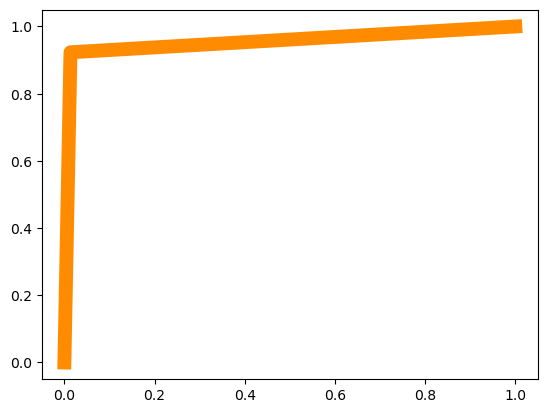

In [104]:
from sklearn.metrics import auc
fpr,tpr,threshold= roc_curve(pred,y_test)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=10, label='ROC curve(area=%0.2f)' %roc_auc)

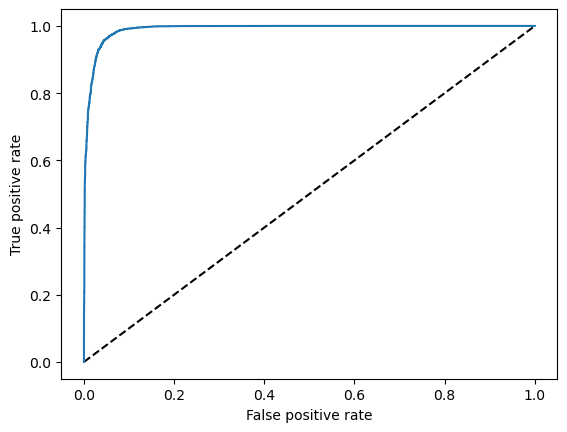

Auc score:
 0.9531444482064413


In [105]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label= 'Random Forest Classifier(area=%0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc score:' '\n', auc_score)

Here we can see area under curve for each model used

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 95%

# Saving the model

In [106]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model, "Bank Marketing.pkl")

['Bank Marketing.pkl']

# Test DataSet

# Importing Test Dataset

In [107]:
df_test=pd.read_csv('termdeposit_test.csv')
df_test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

# Exploratory Data Analysis(EDA)

**Checking For Null Values**

In [108]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

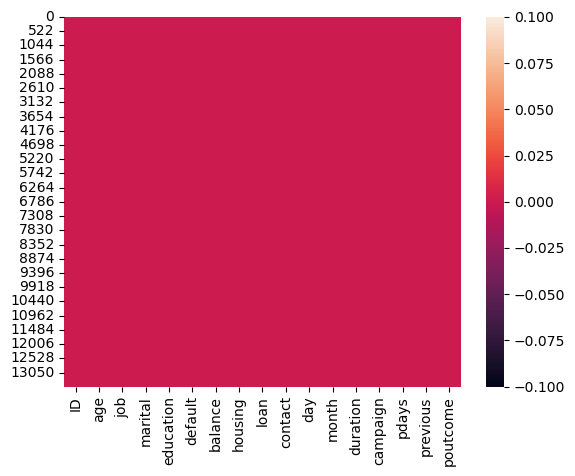

In [109]:
sns.heatmap(df_test.isnull())
plt.show()

We can see there is no null values present in the dataset

In [110]:
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [111]:

df_test.describe()

ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       58.000000    850.000000     55.000000

**observation:**

1 There is no null values present in the dataset

2 In column 'balance', 'duration', 'campaign', 'pdays' mean is greater than median so skewness is present in the dataset

3.There is a huge difference present in the 75th percentile and max. values which shows that the outliers are present in the dataset.

# separating numerical and categorical columns

In [112]:
#separating numerical and categorical columns

#checking for categorical columns

categorical_col_test=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]=='object':
        categorical_col_test.append(i)
print('categorical columns:',categorical_col_test)
print('\n')

categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']




In [113]:
#checking numerical columns
numerical_col_test=[]
for i in df_test.dtypes.index:
    if df_test.dtypes[i]!='object':
        numerical_col_test.append(i)
print('numerical columns:',numerical_col_test)

numerical columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Data Visualization

In [114]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

# Univarient Analysis

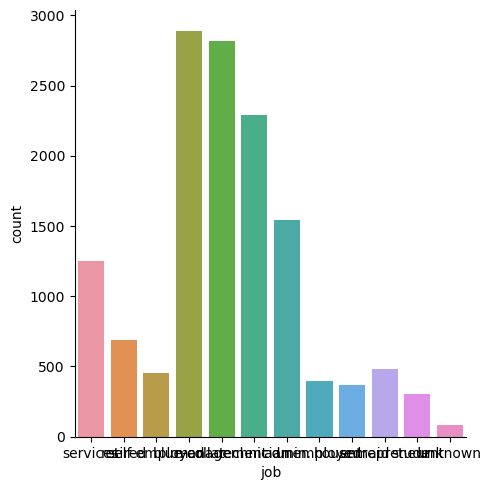

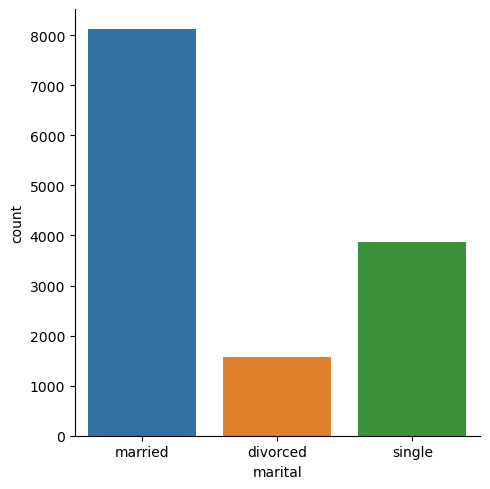

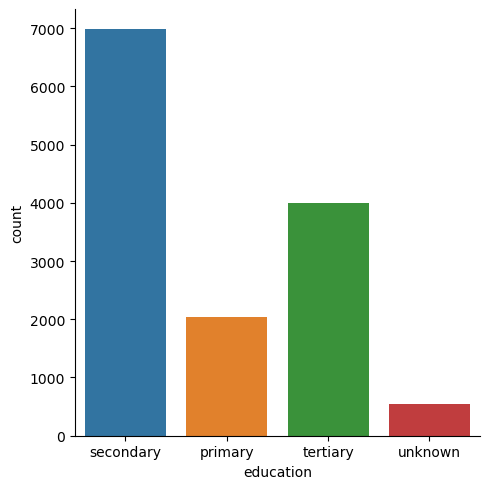

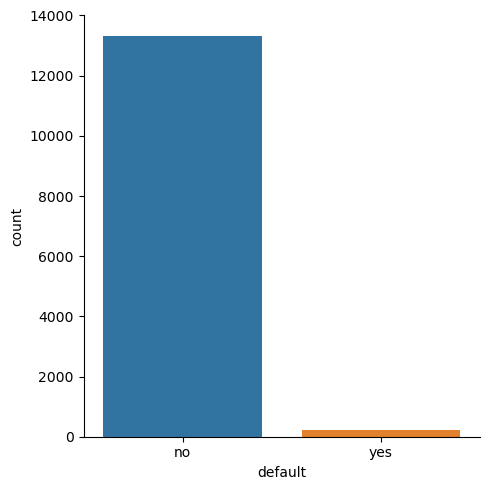

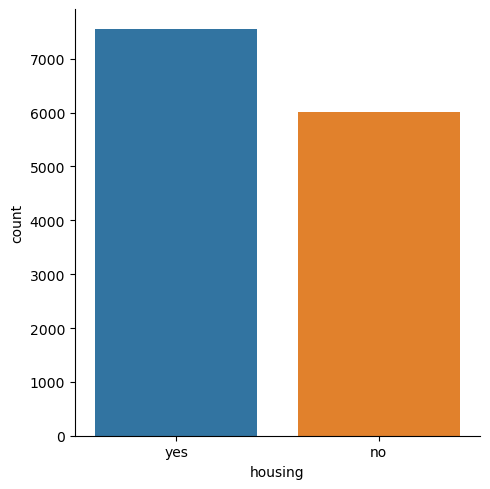

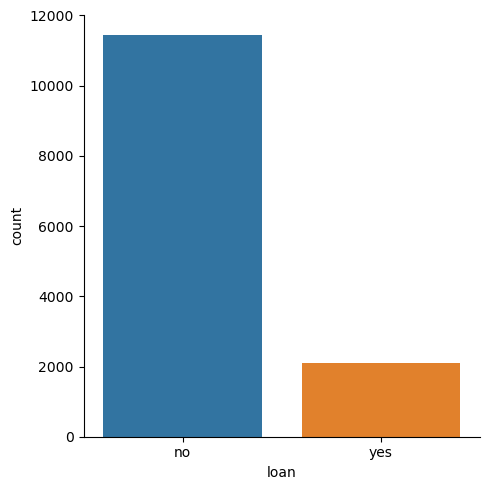

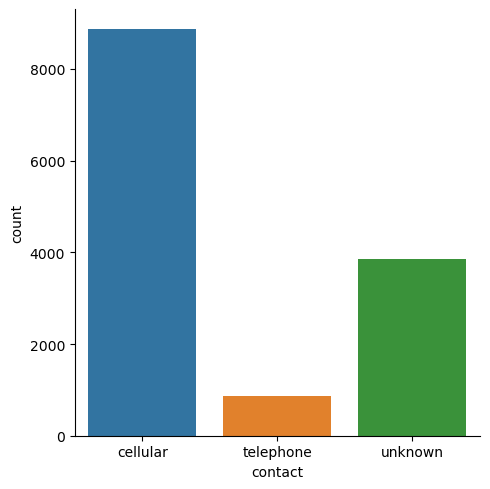

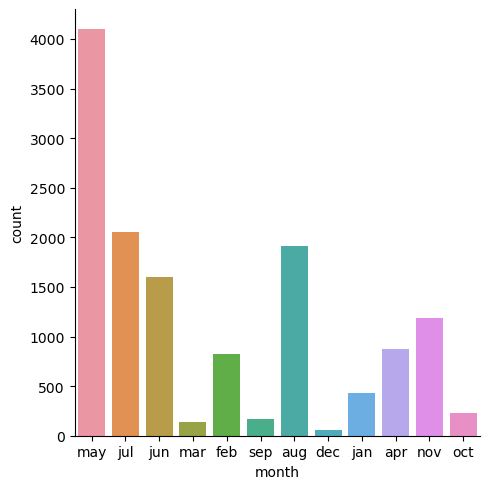

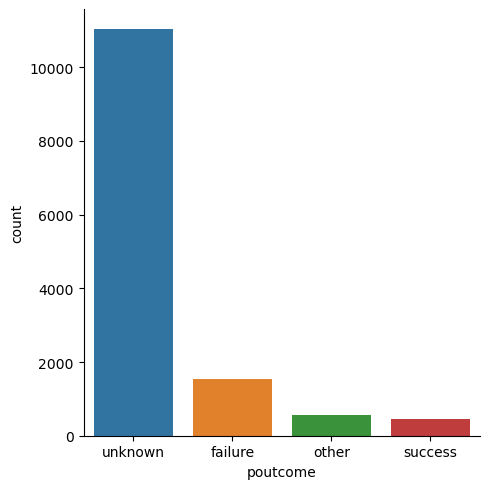

In [115]:
for i in categorical_col_test:
    sns.catplot(x=i, data=df_test, kind='count')
    plt.show()

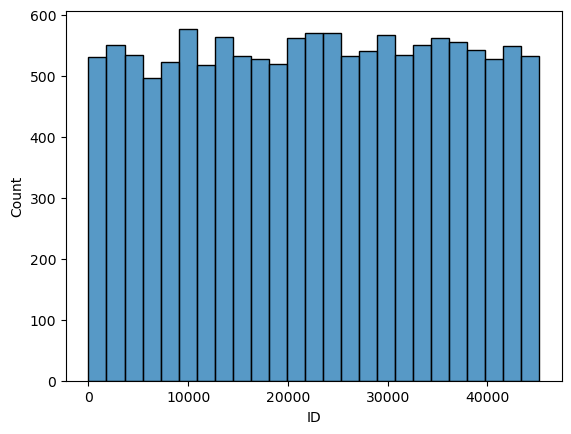

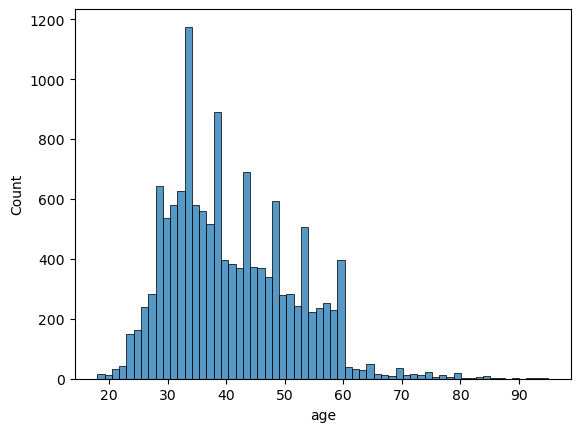

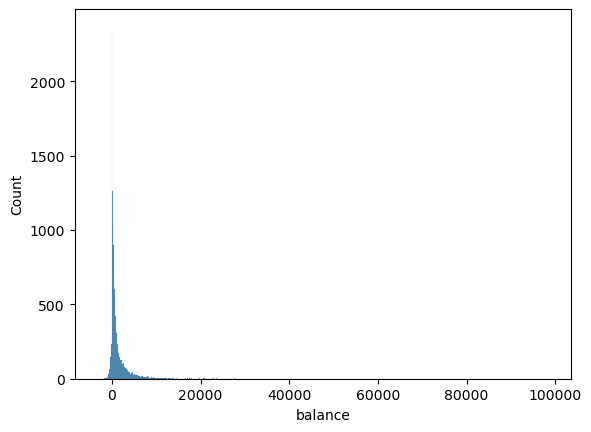

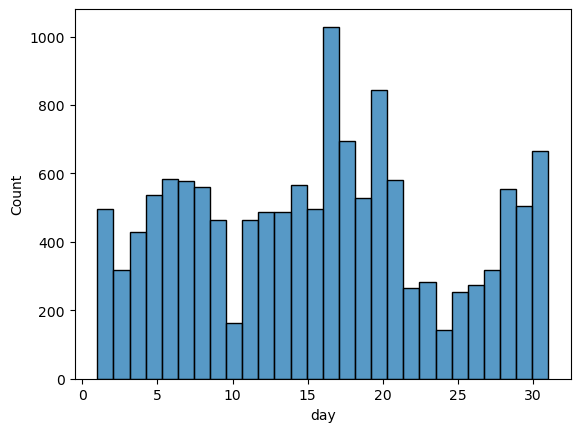

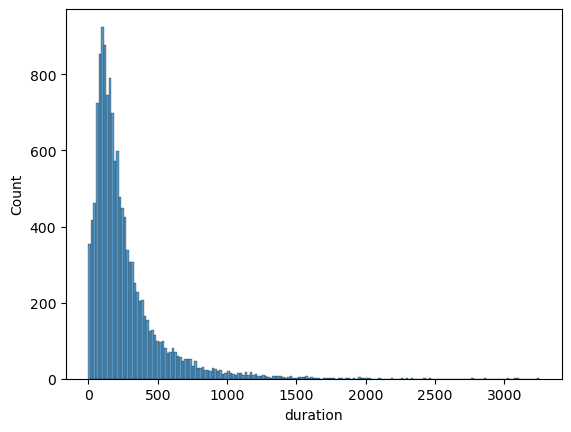

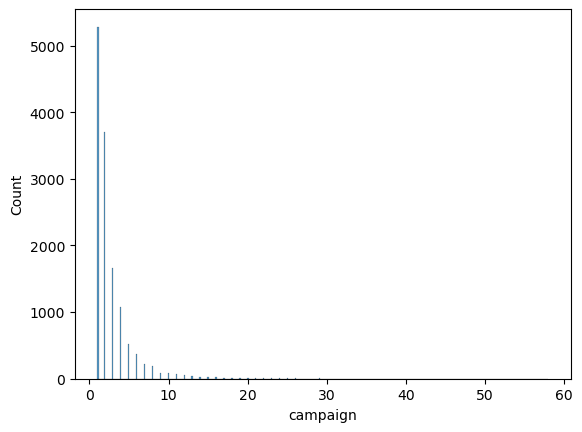

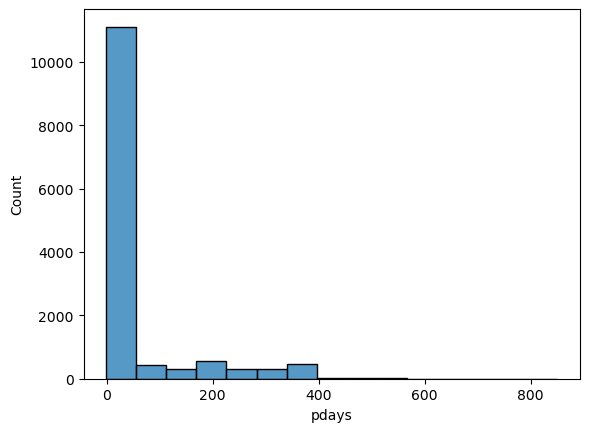

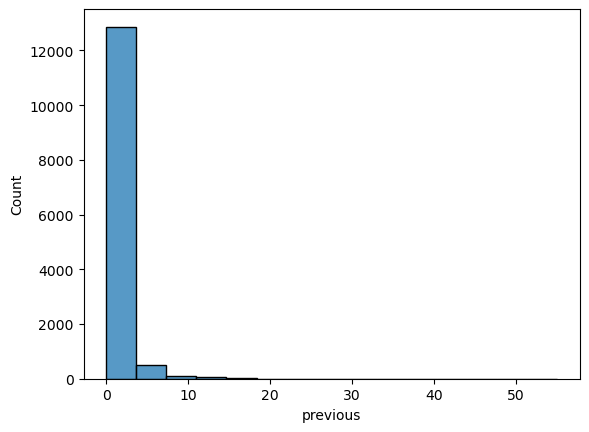

In [116]:
for i in numerical_col_test:
    sns.histplot(x=i, data=df_test)
    plt.show()

# Multivarient Analysis

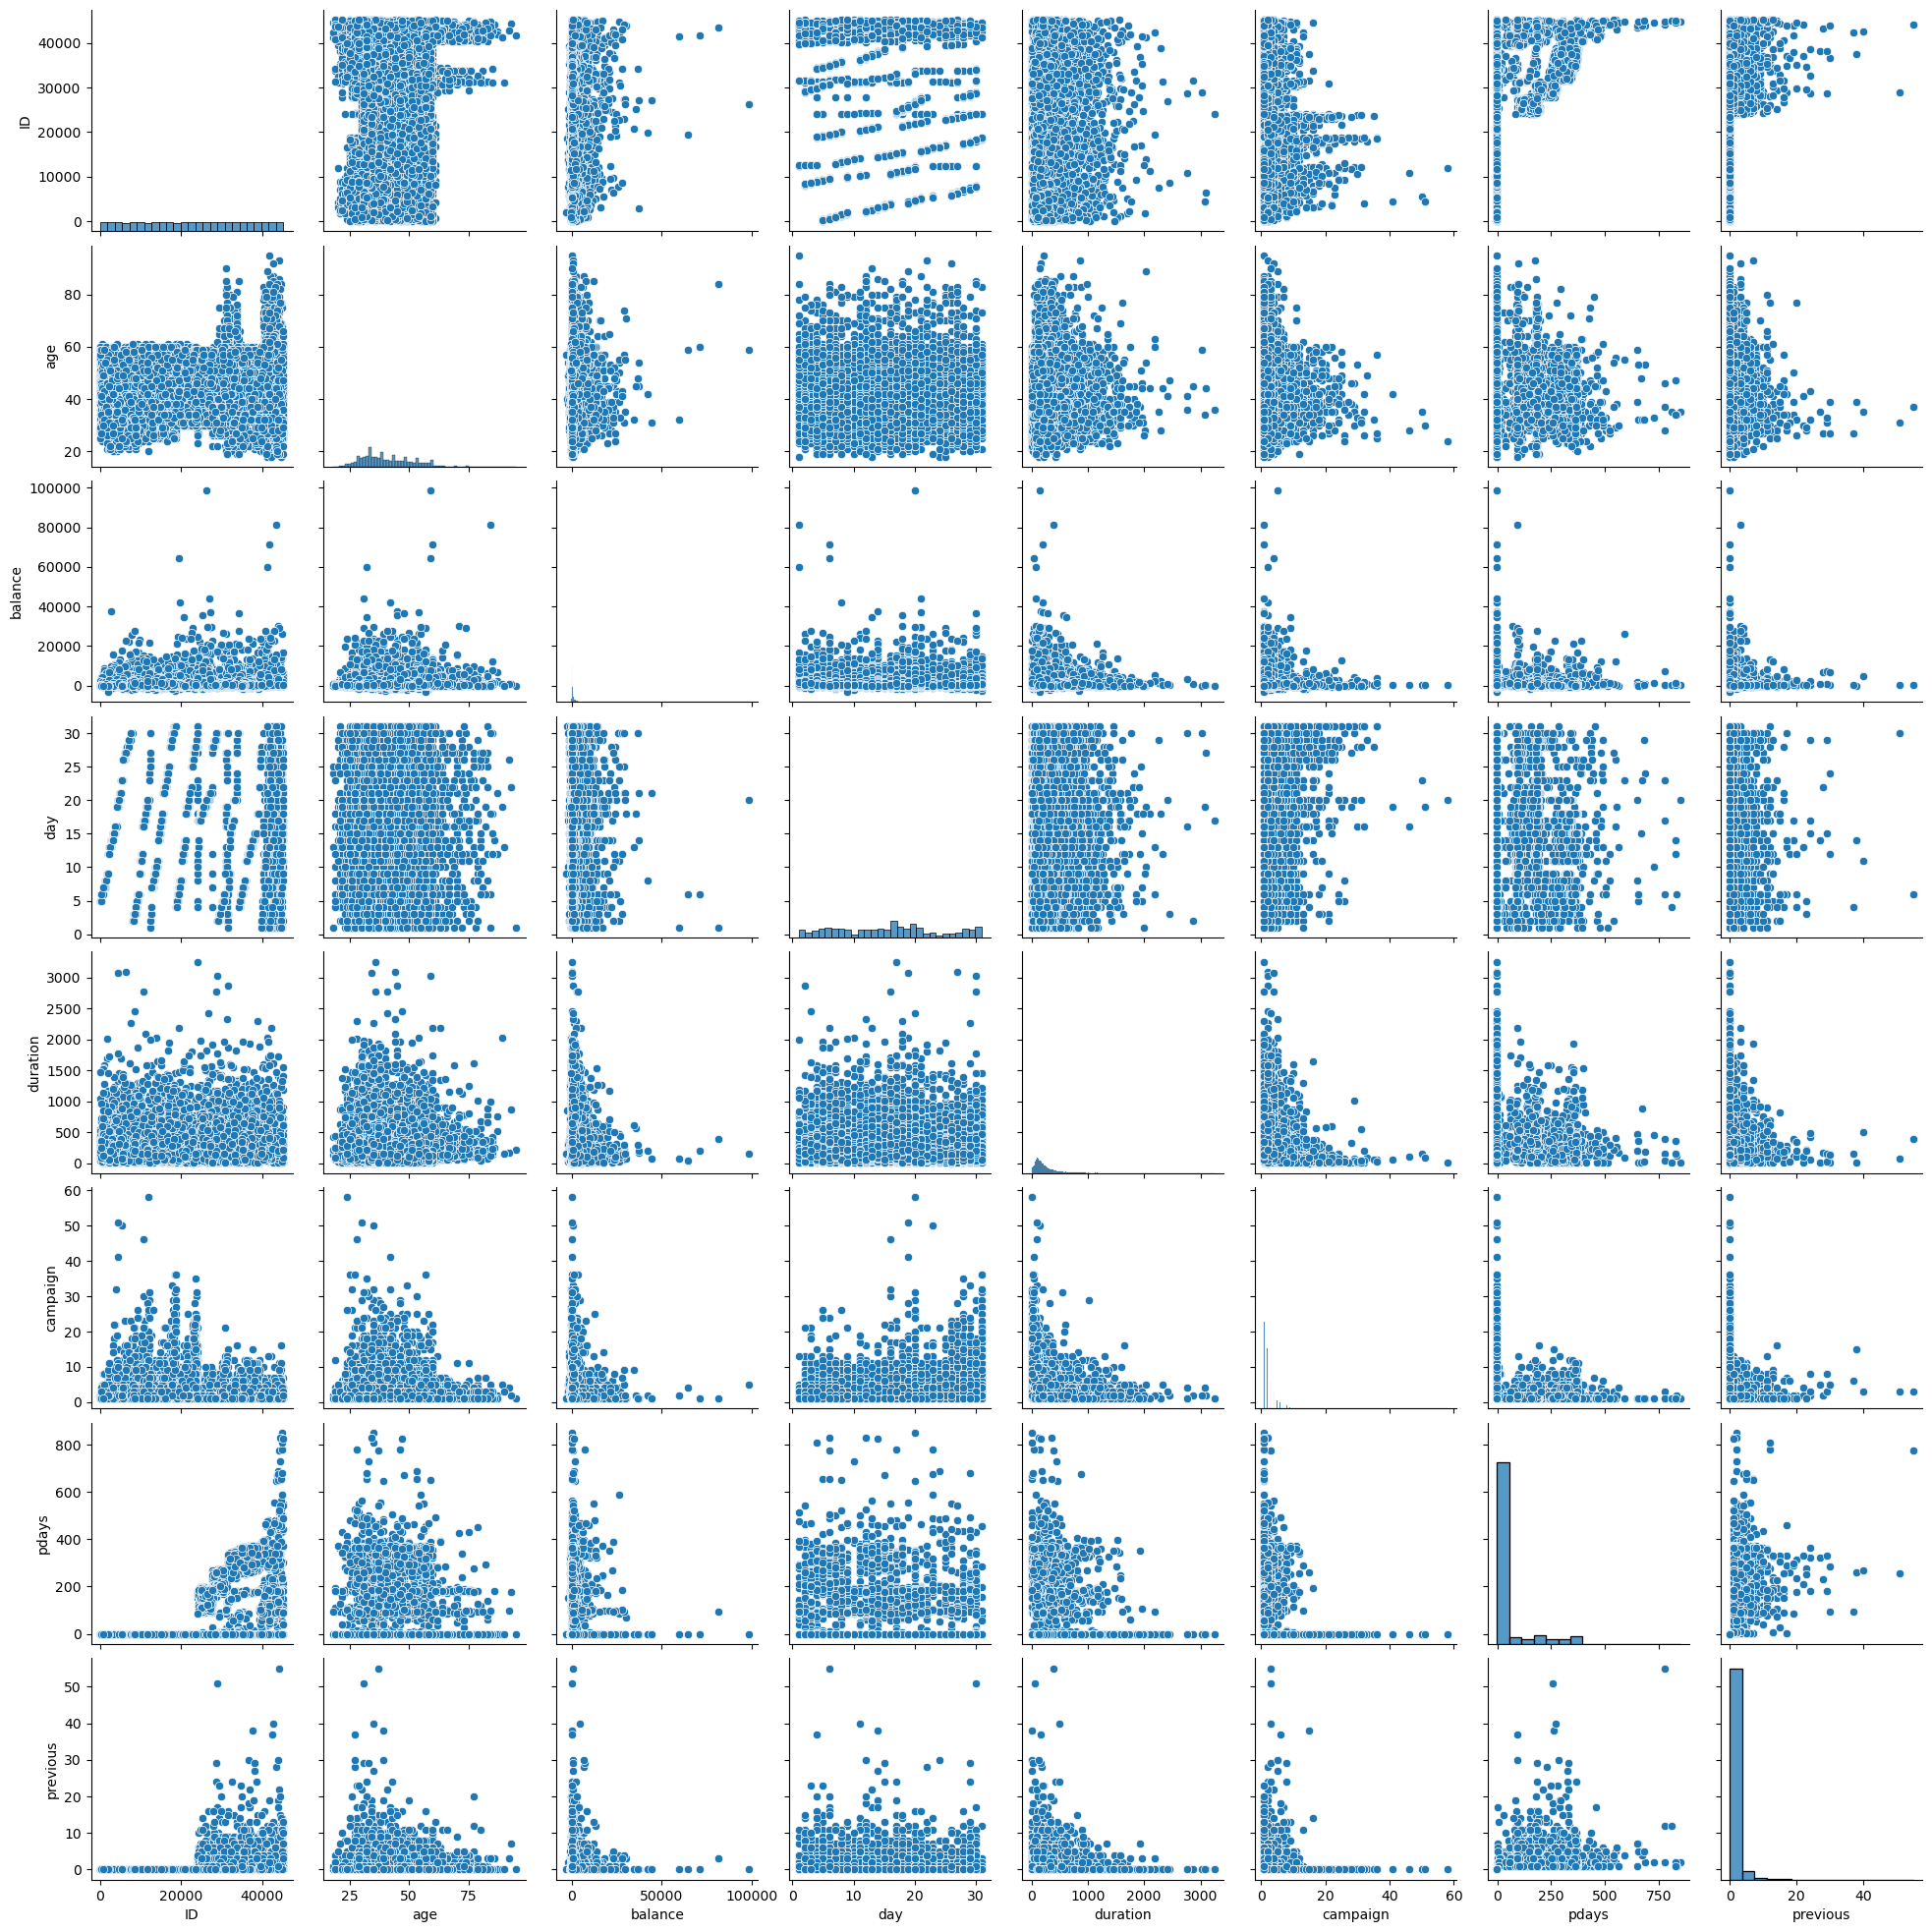

In [117]:
sns.pairplot(df_test)

# Checking for the outliers

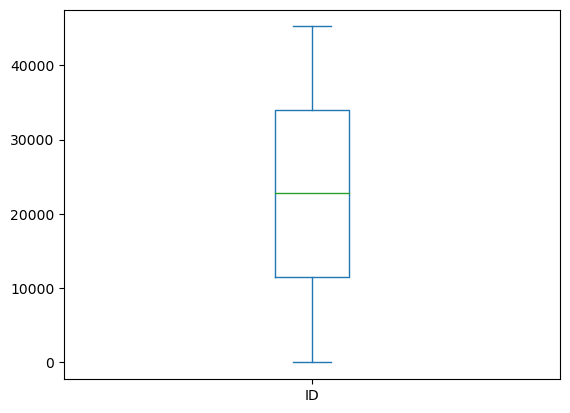

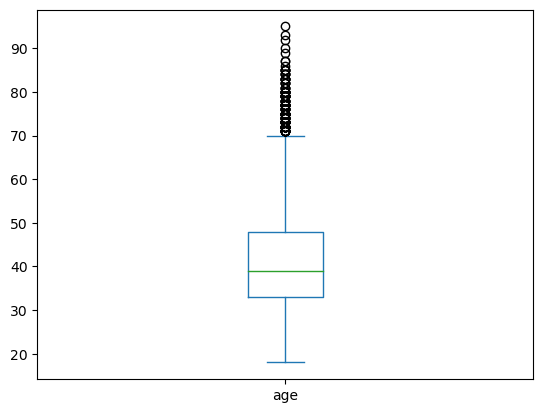

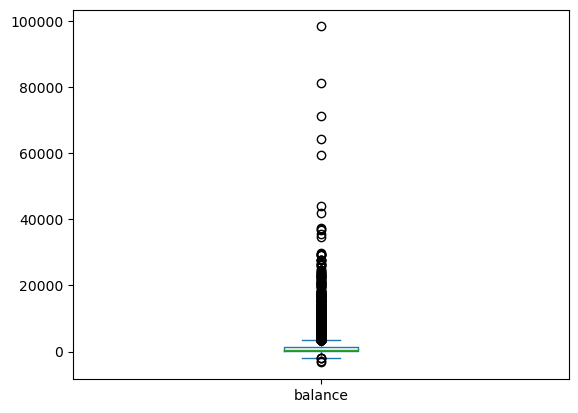

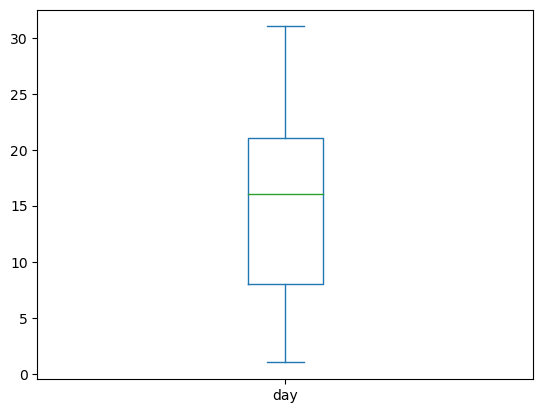

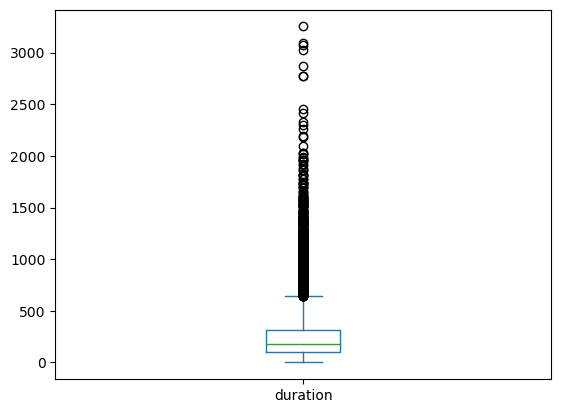

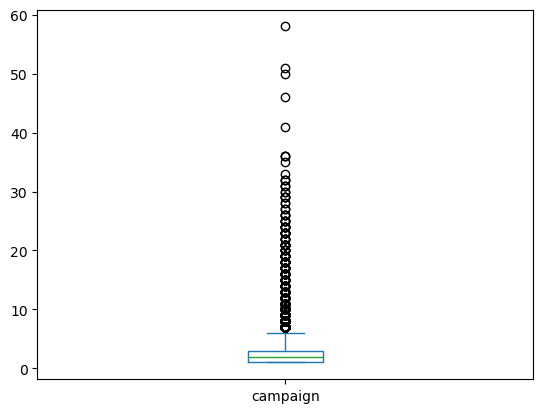

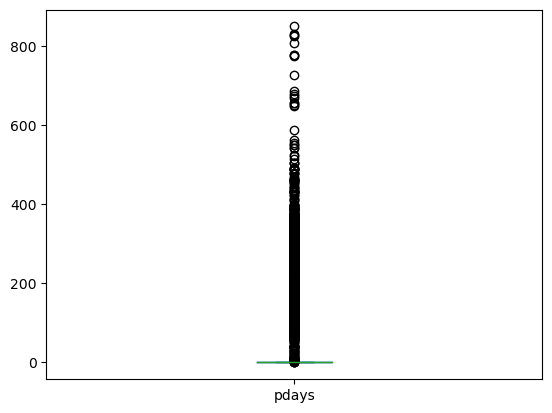

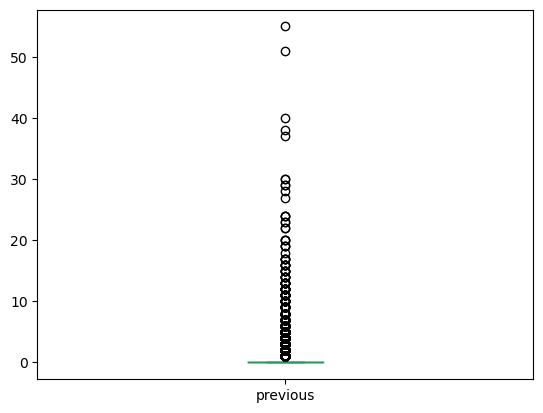

In [118]:
#Box plot visualization
for i in numerical_col_test:
    df_test[i].plot.box()
    plt.show()

# Removing outliers

In [119]:
#Removing outliers
from scipy.stats import zscore
col_test=df_test[['age','balance', 'duration', 'campaign', 'pdays', 'previous']]
z_test=np.abs(zscore(col_test))

z_test

age   balance  duration  campaign     pdays  previous
0      0.838114  0.402389  0.921849  1.058702  0.418199  0.297500
1      3.499987  0.463375  0.439963  0.574850  0.418199  0.297500
2      0.932421  0.393955  1.616074  0.574850  0.418199  0.297500
3      1.519549  0.784508  0.747754  0.248140  0.418199  0.297500
4      0.387871  0.669352  0.569789  0.574850  0.418199  0.297500
...         ...       ...       ...       ...       ...       ...
13559  0.177969  0.426069  0.426644  0.405281  0.418199  0.297500
13560  1.236630  0.299239  0.387957  0.574850  0.418199  0.297500
13561  0.555195  0.348218  0.473070  0.574850  0.418199  0.297500
13562  1.121034  0.290155  0.194517  0.248140  0.483926  1.203911
13563  1.121034  0.440017  0.312293  0.574850  3.141273  0.202970

[13564 rows x 6 columns]

In [120]:
threshold=3

print(np.where(z_test>3))

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64), array([0, 4, 1, ..., 2, 3, 4], dtype=int64))


In [121]:
df_new_test=df_test[(z_test<3).all(axis=1)]

df_new_test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
5      16013   32     management    single   tertiary      no        0   
...      ...  ...            ...       ...        ...     ...      ...   
13558  35237   32     technician    single  secondary      no      129   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
5         yes   no   cellular   22   jul       455         2     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13558     yes   no   cellular    7   may       213         1     -1         0   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   

      poutcome  
0      unknown  
2      unknown  
3      unknown  
4      unknown  
5      unknown  
...        ...  
13558  unknown  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  

[12034 rows x 17 columns]

In [122]:
df_test.shape

(13564, 17)

In [123]:
df_new_test.shape

(12034, 17)

In [124]:
df_test=df_new_test

In [125]:
df_test.shape

(12034, 17)

Here outliers are removed from the dataset.

# Checking for skewness

In [126]:
#checking for skewness
df_test.skew()

ID          0.061154
age         0.435270
balance     2.476671
day         0.100926
duration    1.578135
campaign    1.958366
pdays       2.728161
previous    3.398894
dtype: float64

accpectable range is from -0.5 to +0.5

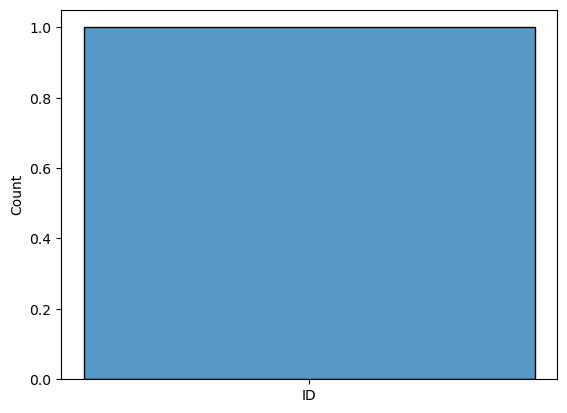

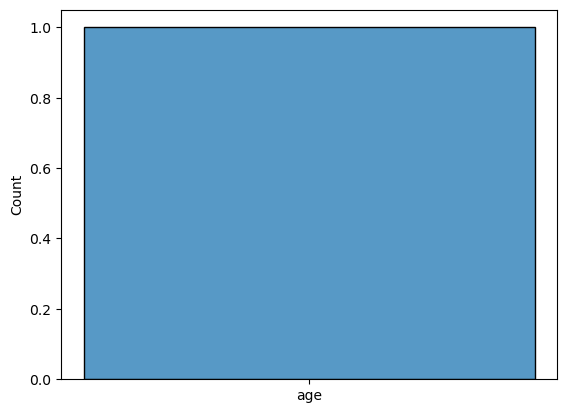

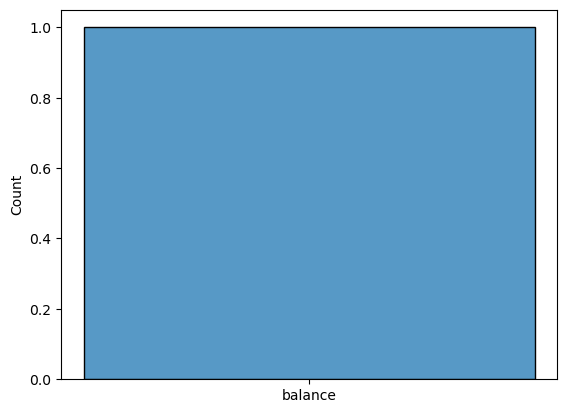

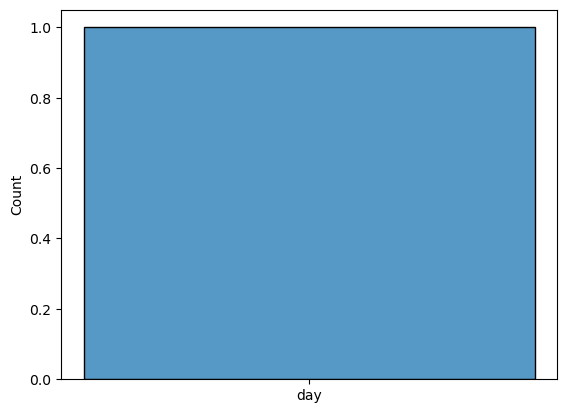

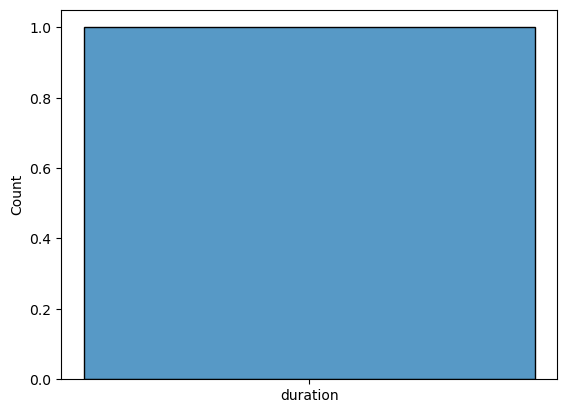

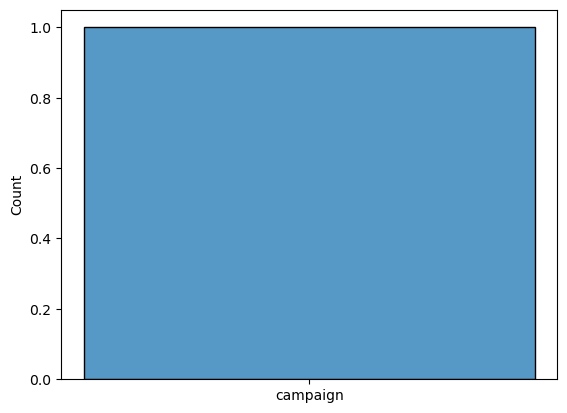

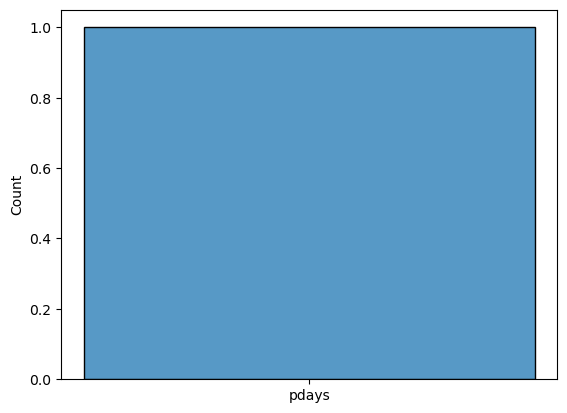

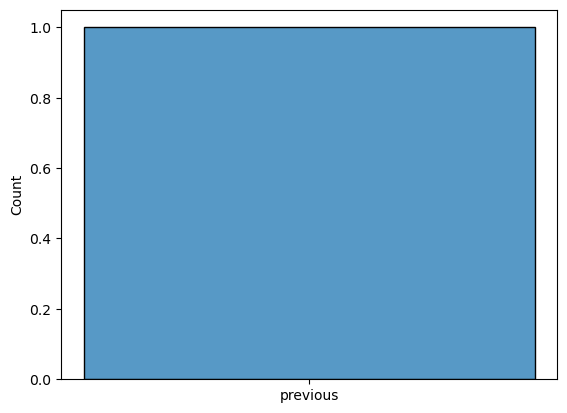

In [127]:
##checking for skewness by visualizing
for i in numerical_col_test:
    sns.histplot([i])
    plt.show()

Here by visualizaing with histplot we can say that skewness is removed from the dataset.

# Encoding Categorical Columns

In [128]:
#Encoding categorical columns using label Encoder

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=LE.fit_transform(df_test[i].values.reshape(-1,1))
        
df_test

ID  age  job  marital  education  default  balance  housing  loan  \
0      38441   32    7        1          1        0      118        1     0   
2       3709   31    6        2          2        0      144        1     0   
3      37422   57    7        2          0        0     3777        1     0   
4      12527   45    1        0          1        0     -705        0     1   
5      16013   32    4        2          2        0        0        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
13558  35237   32    9        2          1        0      129        1     0   
13559  23465   39    4        1          2        0       45        0     0   
13560  11743   54    1        1          0        0     2281        1     0   
13561  28292   35    5        1          0        0      285        1     0   
13562  45163   29    0        2          1        0      464        0     0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0            0   15      8        20         6     -1         0         3  
2            2   16      8       676         1     -1         0         3  
3            1   13      8        65         2     -1         0         3  
4            2    3      5       111         1     -1         0         3  
5            0   22      5       455         2     -1         0         3  
...        ...  ...    ...       ...       ...    ...       ...       ...  
13558        0    7      8       213         1     -1         0         3  
13559        0   28      1       148         4     -1         0         3  
13560        2   20      6       158         1     -1         0         3  
13561        0   29      4       136         1     -1         0         3  
13562        0    9      9       208         2     91         3         2  

[12034 rows x 17 columns]

In [129]:
df_test.describe()

ID           age           job       marital     education  \
count  12034.000000  12034.000000  12034.000000  12034.000000  12034.000000   
mean   21759.095646     40.669603      4.362390      1.166528      1.221290   
std    12828.361980     10.113132      3.285529      0.609236      0.741483   
min        1.000000     18.000000      0.000000      0.000000      0.000000   
25%    10700.250000     33.000000      1.000000      1.000000      1.000000   
50%    21565.000000     39.000000      4.000000      1.000000      1.000000   
75%    32486.250000     48.000000      7.000000      2.000000      2.000000   
max    45206.000000     72.000000     11.000000      2.000000      3.000000   

            default       balance       housing         loan       contact  \
count  12034.000000  12034.000000  12034.000000  12034.00000  12034.000000   
mean       0.017700   1086.501330      0.553681      0.15988      0.659880   
std        0.131864   1741.993258      0.497131      0.36651      0.910108   
min        0.000000  -3313.000000      0.000000      0.00000      0.000000   
25%        0.000000     65.000000      0.000000      0.00000      0.000000   
50%        0.000000    425.000000      1.000000      0.00000      0.000000   
75%        0.000000   1333.000000      1.000000      0.00000      2.000000   
max        1.000000  10596.000000      1.000000      1.00000      2.000000   

                day        month      duration      campaign         pdays  \
count  12034.000000  12034.00000  12034.000000  12034.000000  12034.000000   
mean      15.708160      5.46834    235.780871      2.441416     27.500166   
std        8.288185      2.99092    190.727111      1.892068     76.622382   
min        1.000000      0.00000      0.000000      1.000000     -1.000000   
25%        8.000000      3.00000    103.000000      1.000000     -1.000000   
50%       16.000000      6.00000    177.000000      2.000000     -1.000000   
75%       21.000000      8.00000    306.750000      3.000000     -1.000000   
max       31.000000     11.00000   1032.000000     11.000000    347.000000   

           previous      poutcome  
count  12034.000000  12034.000000  
mean       0.348263      2.646086  
std        1.005818      0.906759  
min        0.000000      0.000000  
25%        0.000000      3.000000  
50%        0.000000      3.000000  
75%        0.000000      3.000000  
max        6.000000      3.000000

After encoding the categorical columns we can see all columns details here. The counts of all the columns are same that means no null values in the dataset. This describe method describe the count,mean,std.,IQR and max values of all the columns.

# Feature Scalling Using Standard Scalarization

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_test=pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
x_test

ID       age       job   marital  education   default   balance  \
0      1.300446 -0.857298  0.802830 -0.273350  -0.298454 -0.134234 -0.555996   
1     -1.407104 -0.956183  0.498452  1.368116   1.050250 -0.134234 -0.541070   
2      1.221010  1.614839  0.802830  1.368116  -1.647159 -0.134234  1.544558   
3     -0.719693  0.428213 -1.023436 -1.914817  -0.298454 -0.134234 -1.028463   
4     -0.447940 -0.857298 -0.110303  1.368116   1.050250 -0.134234 -0.623737   
...         ...       ...       ...       ...        ...       ...       ...   
12029  1.050677 -0.857298  1.411585  1.368116  -0.298454 -0.134234 -0.549681   
12030  0.132985 -0.165099 -0.110303 -0.273350   1.050250 -0.134234 -0.597904   
12031 -0.780810  1.318182 -1.023436 -0.273350  -1.647159 -0.134234  0.685736   
12032  0.509276 -0.560641  0.194074 -0.273350  -1.647159 -0.134234 -0.460125   
12033  1.824463 -1.153954 -1.327814  1.368116  -0.298454 -0.134234 -0.357365   

        housing      loan   contact       day     month  duration  campaign  \
0      0.897827 -0.436241 -0.725087 -0.085446  0.846484 -1.131406  1.880869   
1      0.897827 -0.436241  1.472546  0.035213  0.846484  2.308206 -0.761852   
2      0.897827 -0.436241  0.373729 -0.326763  0.846484 -0.895457 -0.233308   
3     -1.113800  2.292308  1.472546 -1.533350 -0.156594 -0.654265 -0.761852   
4      0.897827 -0.436241 -0.725087  0.759165 -0.156594  1.149434 -0.233308   
...         ...       ...       ...       ...       ...       ...       ...   
12029  0.897827 -0.436241 -0.725087 -1.050715  0.846484 -0.119447 -0.761852   
12030 -1.113800 -0.436241 -0.725087  1.483117 -1.494030 -0.460262  0.823780   
12031  0.897827 -0.436241  1.472546  0.517848  0.177765 -0.407829 -0.761852   
12032  0.897827 -0.436241 -0.725087  1.603776 -0.490953 -0.523182 -0.761852   
12033 -1.113800 -0.436241 -0.725087 -0.809398  1.180843 -0.145664 -0.233308   

          pdays  previous  poutcome  
0     -0.371972 -0.346263  0.390323  
1     -0.371972 -0.346263  0.390323  
2     -0.371972 -0.346263  0.390323  
3     -0.371972 -0.346263  0.390323  
4     -0.371972 -0.346263  0.390323  
...         ...       ...       ...  
12029 -0.371972 -0.346263  0.390323  
12030 -0.371972 -0.346263  0.390323  
12031 -0.371972 -0.346263  0.390323  
12032 -0.371972 -0.346263  0.390323  
12033  0.828772  2.636507 -0.712552  

[12034 rows x 17 columns]

In [131]:
#Finding varience inflation factor in each column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(df_test.values,i)
            for i in range(len(df_test.columns))]
vif['Features']=df_test.columns
vif

VIF Values   Features
0     9.243787         ID
1    15.853416        age
2     2.849398        job
3     5.062934    marital
4     3.811027  education
5     1.034316    default
6     1.459979    balance
7     2.586085    housing
8     1.221856       loan
9     3.788308    contact
10    4.587752        day
11    5.543330      month
12    2.543601   duration
13    2.806407   campaign
14    4.061720      pdays
15    2.849121   previous
16   27.614179   poutcome

Accpectable range is betwen +10 to -10

we firstly drop the column with highest vif value

In [132]:
#dropping poutcome column 
df_test.drop('poutcome', axis=1, inplace=True)

In [133]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(df_test.values,i)
            for i in range(len(df_test.columns))]
vif['Features']=df_test.columns
vif

VIF Values   Features
0     8.412623         ID
1    10.908086        age
2     2.808433        job
3     4.486026    marital
4     3.730942  education
5     1.033394    default
6     1.455530    balance
7     2.497298    housing
8     1.211507       loan
9     3.539820    contact
10    4.458789        day
11    5.506775      month
12    2.467234   duration
13    2.715633   campaign
14    2.615858      pdays
15    2.512168   previous

Now here we can say that all the columns has vif value in accpectable range and multicolinearity is removed from the dataset.

**Providing this dataset to our final model to predict the subscribe the term deposite**

In [134]:
#Lets Load the saved model and get the prediction
model=joblib.load("Bank Marketing.pkl")

#prediction
prediction=model.predict(df_test)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [135]:
print(prediction)

[1 1 1 ... 1 1 1]


In [136]:
len(prediction)

12034

Here we can see that either the clients subscribe the term deposit or not

# END OF THE PROJECT